In [1]:
import os
import math
import pickle
# import gmplot
import folium
import urllib
import osmnx as ox
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
from sklearn.neighbors import KDTree
from pandas import DataFrame
import networkx as nx
import random
import ksp
from ksp import AdjacencyDict, yen, dijkstra
import pickle
# %matplotlib notebook

## Generate a Bounding Box

In [2]:
[north, south, west, east] = [48.8, 48.9, 2.25, 2.4] # Large Polygon

m = folium.Map(location=[(north+south)/2, (west+east)/2], zoom_start=10)
m.add_child(folium.PolyLine([[south,west],[south,east], [north,east], [north,west], [south,west]]))
display(m)

## Load the Graph for the Bounding box if it not exists then download it

In [3]:
pathToData = './'
if not os.path.exists(pathToData + "dataExtracted/"):
    os.makedirs(pathToData + "dataExtracted/")
try:
    G_Drive = pickle.load(open(pathToData + "dataExtracted/" + "G_Drive.pickle", 'rb'))
except:
    G_Drive = ox.graph_from_bbox(north=north, south=south, west=west, east=east, network_type='drive_service')
    pickle.dump(G_Drive,open(pathToData + "dataExtracted/" + "G_Drive.pickle", 'wb'))
nodesDrive, edgesDrive = ox.graph_to_gdfs(G_Drive)
nodesCoords = nodesDrive[['y', 'x']]
tree = KDTree(nodesCoords, metric='euclidean')

In [4]:
edgesDrive

,osmid,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key
0,84416296,3,Rue de Tolbiac,secondary,30,False,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,2301459230,0
1,84416296,3,Rue de Tolbiac,secondary,30,False,114.399,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,361704,0
2,3599327,NaN,Rue de Tolbiac,secondary,50,False,100.436,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,253316556,0
3,157910468,NaN,Rue de Tolbiac,secondary,30,False,90.840,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,5487025239,0
4,309765258,5,Avenue d'Italie,primary,50,False,44.575,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,252659093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36785,890090845,NaN,Rue Salneuve,residential,NaN,False,12.310,"LINESTRING (2.31405 48.88599, 2.31403 48.88604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,252969207,0
36786,890987117,NaN,Rue Larmeroux,secondary,30,True,15.399,"LINESTRING (2.27841 48.81501, 2.27848 48.81514)",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060791,8281060792,0
36787,17041550,NaN,Rue Larmeroux,secondary,30,True,45.328,"LINESTRING (2.27848 48.81514, 2.27832 48.81503...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,30730578,0
36788,"[798929041, 51077358]",NaN,Rue Larmeroux,secondary,30,False,328.818,"LINESTRING (2.27848 48.81514, 2.27908 48.81566...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,5225408365,0


In [5]:
nodesDrive

,y,x,osmid,highway,ref,geometry
360930,48.826346,2.361498,360930,NaN,NaN,POINT (2.36150 48.82635)
360932,48.826185,2.357263,360932,traffic_signals,NaN,POINT (2.35726 48.82619)
360933,48.826075,2.355218,360933,NaN,NaN,POINT (2.35522 48.82607)
360935,48.825812,2.350378,360935,traffic_signals,NaN,POINT (2.35038 48.82581)
360937,48.825755,2.346587,360937,traffic_signals,NaN,POINT (2.34659 48.82575)
...,...,...,...,...,...,...
8271283014,48.896816,2.264619,8271283014,NaN,NaN,POINT (2.26462 48.89682)
8273589924,48.885995,2.314046,8273589924,NaN,NaN,POINT (2.31405 48.88599)
8281060791,48.815010,2.278407,8281060791,NaN,NaN,POINT (2.27841 48.81501)
8281060792,48.815139,2.278485,8281060792,NaN,NaN,POINT (2.27848 48.81514)


In [6]:
edgesDrive.geometry.iloc[1].coords.xy

(array('d', [2.3614982, 2.3607406, 2.360655, 2.3602855, 2.3599615]),
 array('d', [48.8263456, 48.8262432, 48.8262331, 48.8261849, 48.8261632]))

In [7]:
len(edgesDrive)

36790

In [8]:
len(G_Drive)

18298

## Load AXA speed data

In [9]:
df = pd.read_csv('dataExtracted/AXA/agg_speeds.csv.zip')
df.head(2)
Speed = df
Speed

,osm_id,weekend,month,hour,year,avg_min_speed,avg_avg_speed,avg_med_speed,avg_max_speed,std_min_speed,std_avg_speed,std_med_speed,std_max_speed,count
0,27627808,0,7,10,2018,54.000000,66.125000,69.000000,75.500000,22.568415,16.301202,18.511257,9.433982,4
1,154794710,1,12,8,2017,9.999999,13.999999,13.000000,18.000000,8.485281,2.828426,4.242639,2.828429,2
2,118240952,0,10,20,2017,18.000000,32.000000,38.000002,47.999999,NaN,NaN,NaN,NaN,1
3,30173873,0,10,14,2017,36.444445,43.222222,50.000000,50.000000,28.262657,20.692860,20.124612,20.124612,9
4,166408696,1,3,12,2018,20.800000,21.933333,22.800000,23.200000,10.158741,9.364235,9.121404,8.671794,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22087519,192903836,1,11,18,2017,4.800001,7.200001,7.200001,8.400000,1.788854,1.788854,1.788854,3.286334,5
22087520,166970054,0,9,22,2018,7.999999,7.999999,7.999999,7.999999,NaN,NaN,NaN,NaN,1
22087521,158858253,0,1,8,2018,0.000000,0.400000,0.000000,2.000000,0.000000,0.565685,0.000000,2.828427,2
22087522,40266592,0,3,12,2018,14.363637,23.695887,25.636363,31.999999,9.790533,8.088466,9.025217,10.039920,11


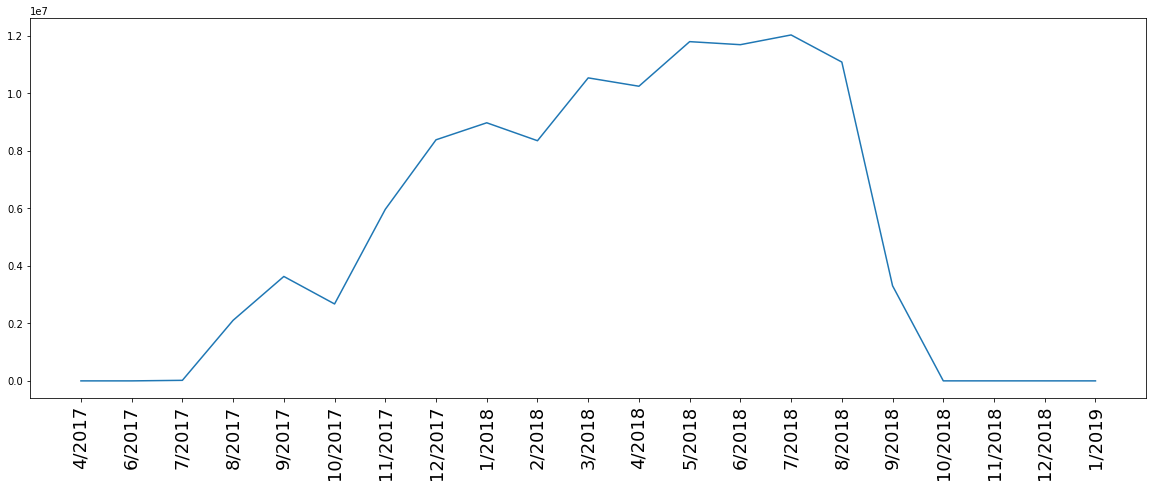

In [10]:
monthCounts = df.groupby(["month", 'year'])['count'].sum()
monthCounts = monthCounts.reset_index()
monthCounts = monthCounts.sort_values(['year','month'])

fig, ax = plt.subplots(1,1, figsize=(20, 7)) 
ax.plot(range(len(monthCounts['count'])), monthCounts['count'])
xTicks = monthCounts.month.astype(str) + '/' + monthCounts.year.astype(str)
ax.set_xticks(range(len(monthCounts['count'])))
ax.set_xticklabels(xTicks, rotation='vertical', fontsize=18)
plt.show()

## Num Reports per Month

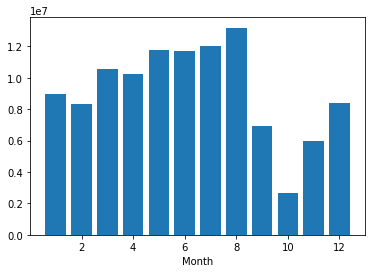

In [11]:
monthCounts = df.groupby(["month"])['count'].sum()
monthCountsDF = pd.DataFrame()
monthCountsDF['month'] = monthCounts.index
monthCountsDF['numReports'] = monthCounts.values
plt.bar(monthCountsDF.month, monthCountsDF.numReports)
plt.xlabel('Month')
plt.show()

## Num Reports per Hour

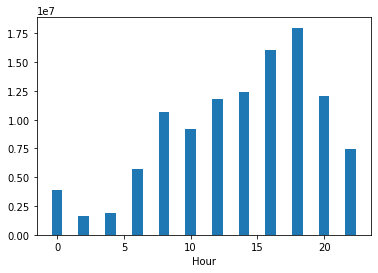

In [12]:
hourCounts = df.groupby(["hour"])['count'].sum()
hourCountsDF = pd.DataFrame()
hourCountsDF['hour'] = hourCounts.index
hourCountsDF['numReports'] = hourCounts.values
hourCountsDF
plt.bar(hourCountsDF.hour, hourCountsDF.numReports)
plt.xlabel('Hour')
plt.show()

## Num Reports per OSM ID

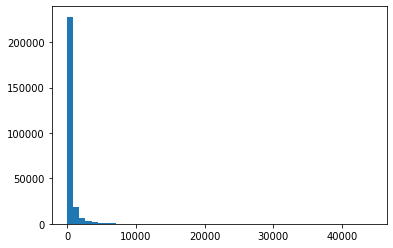

In [13]:
segmentsCounts = df.groupby(["osm_id"])['count'].sum()
segmentsCountsDF = pd.DataFrame()
segmentsCountsDF['osm_id'] = segmentsCounts.index
segmentsCountsDF['numReports'] = segmentsCounts.values
plt.hist(segmentsCountsDF.numReports, bins=50)
plt.show()

In [14]:
segmentsCountsDF = segmentsCountsDF.sort_values(by = ["numReports"], ascending=False)
segmentsCountsDF.head(5)

,osm_id,numReports
28855,25719318,44295
178738,184348432,39799
3597,10231241,37445
16199,23052441,36738
258686,377981558,34296


In [15]:
def get_osmWayPath(osmWay):
    url = 'https://www.openstreetmap.org/api/0.6/way/%d/full'%osmWay
    output = urllib.request.urlopen(url).read()

    root = ET.fromstring(output)
    pathDict = {}
    for node in root.findall("node"):
        nodeID = int(node.attrib['id'])
        lat = float(node.attrib['lat'])
        lon = float(node.attrib['lon'])
        pathDict[nodeID] = [lat, lon]

    path = []
    way = root.findall("way")
    for node in way[0].findall("nd"):
        nodeID = int(node.attrib['ref'])
        path.append(pathDict[nodeID])
    path = pd.DataFrame(path)
    return path

## Plot an OSM way

In [16]:
osmWay = 84416296

path = get_osmWayPath(osmWay)
m = folium.Map([path.iloc[:,0].mean(), path.iloc[:,1].mean()], zoom_start=14)
m.add_child(folium.PolyLine(path.iloc[:,[0,1]], tooltip='osmWay - %d'%(osmWay)))
m.add_child(folium.Circle([path.iloc[0,0], path.iloc[0,1]], radius = 10,color = 'green'))
m

# Accidents Data

## Load Accident data tables

In [17]:
def read_csv(fileName):
    first_line = None
    with open(fileName) as f:
        first_line = f.readline()
        numCommas = len(first_line.split(","))
        numTabs = len(first_line.split("\t"))
        if numCommas > numTabs:
            return pd.read_csv(fileName, sep = ',')
        else:
            return pd.read_csv(fileName, sep = '\t')

In [18]:
year = 2005
characteristicsDF = pd.read_csv('dataExtracted/accidents/caracteristiques_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1')
characteristicsDF = pd.read_csv('dataExtracted/accidents/caracteristiques_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1')
placesDF = pd.read_csv('dataExtracted/accidents/lieux_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1')
vehiclesDF = pd.read_csv('dataExtracted/accidents/vehicules_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1')
usersDF = pd.read_csv('dataExtracted/accidents/usagers_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1')

for year in range(2006,2018):
    print(year)
    try:
        characteristics = pd.read_csv('dataExtracted/accidents/caracteristiques_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1')
    except:
        characteristics = pd.read_csv('dataExtracted/accidents/caracteristiques_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1', sep = '\t')
    try:
        places = pd.read_csv('dataExtracted/accidents/lieux_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1')
    except:
        places = pd.read_csv('dataExtracted/accidents/lieux_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1', sep = '\t')
    try:
        vehicles = pd.read_csv('dataExtracted/accidents/vehicules_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1')
    except:
        vehicles = pd.read_csv('dataExtracted/accidents/vehicules_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1', sep = '\t')
    try:
        users = pd.read_csv('dataExtracted/accidents/usagers_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1')
    except:
        users = pd.read_csv('dataExtracted/accidents/usagers_%d.csv.gz'%year, engine = 'python', encoding='ISO-8859-1', sep = '\t')
    characteristicsDF = characteristicsDF.append(characteristics, ignore_index=True)
    placesDF = placesDF.append(places, ignore_index=True)
    vehiclesDF = vehiclesDF.append(vehicles, ignore_index=True)
    usersDF = usersDF.append(users, ignore_index=True)

2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017


## Generate Accident Description

In [19]:
def printAccidentDescription(numAcc):
    print("Accident Description")

    print( "Num_Acc: %d" %numAcc)
    characteristicRow = characteristicsDF[characteristicsDF.Num_Acc ==  numAcc]
#     characteristicRow
#     print characteristicRow.jour
#     print characteristicRow.mois
#     print characteristicRow.an
#     print characteristicRow.hrmn
    print( "Date: %d/%d/%d - Time %d"%(characteristicRow.jour, characteristicRow.mois, characteristicRow.an, characteristicRow.hrmn))
    lightingCondition = {}
    lightingCondition[1] = 'Full day'
    lightingCondition[2] = 'Twilight or dawn'
    lightingCondition[3] = 'Night without public lighting'
    lightingCondition[4] = 'Night with public lighting not on'
    lightingCondition[5] = 'Night with public lighting on'
    print("Lighting Condition: %s" %lightingCondition[characteristicRow.lum.values[0]])

    intersection = {}
    intersection[1] = 'Out of intersection'
    intersection[2] = 'Intersection in X'
    intersection[3] = 'Intersection in T'
    intersection[4] = 'Intersection in Y'
    intersection[5] = 'Intersection with more than 4 branches'
    intersection[6] = 'Giratory (Roundabout)'
    intersection[7] = 'Square'
    intersection[8] = 'Level crossing'
    intersection[9] = 'Other intersection'
    print("Type of intersection: %s" %intersection[characteristicRow.int.values[0]])

    atmosphericCondition = {}
    atmosphericCondition[1] = 'Normal'
    atmosphericCondition[2] = 'Light rain'
    atmosphericCondition[3] = 'Strong rain'
    atmosphericCondition[4] = 'Snow - hail'
    atmosphericCondition[5] = 'Fog - smoke'
    atmosphericCondition[6] = 'Strong wind - storm'
    atmosphericCondition[7] = 'Dazzling time'
    atmosphericCondition[8] = 'Overcast'
    atmosphericCondition[9] = 'Other'
    print("Atmospheric Condition: %s" %atmosphericCondition[characteristicRow.atm.values[0]])

    collisionType = {}
    collisionType[1] = 'Two vehicles - frontal'
    collisionType[2] = 'Two vehicles - from the rear'
    collisionType[3] = 'Two vehicles - by the side'
    collisionType[4] = 'Three vehicles and more - in chain'
    collisionType[5] = 'Three or more vehicles - multiple collisions'
    collisionType[6] = 'Other collision'
    collisionType[7] = 'Without collision'
    print("Type of collision: %s" %collisionType[characteristicRow.col.values[0]])

    placesDF[placesDF.Num_Acc==201100029622]

## Load the accidents Locations (provided by AXA)

In [20]:
dfAccidents = pd.read_csv('dataExtracted/AXA/accidents_all_geocoded.csv', engine = 'python', encoding='ISO-8859-1')
dfAccidents.head(5)

,idx,osm_id,frac,coord,geocoded_by
0,200500000001,60727381.0,0.451772,"{""type"":""Point"",""coordinates"":[2.9417446820128...",approx
1,200500000004,260913014.0,0.445212,"{""type"":""Point"",""coordinates"":[2.4060891063625...",approx
2,200500000005,315860447.0,1.000000,"{""type"":""Point"",""coordinates"":[2.4766551,50.96...",approx
3,200500000006,260913014.0,0.031996,"{""type"":""Point"",""coordinates"":[2.3957310981996...",approx
4,200500000008,53501864.0,0.405648,"{""type"":""Point"",""coordinates"":[2.5311486550812...",approx


In [21]:
print (dfAccidents.shape)
print (characteristicsDF.shape)

(485183, 5)
(900686, 16)


In [22]:
characteristicsDF

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,11.0,CD41B,M,5051500.0,294400.0,590
1,200500000002,5,1,21,1600,1,2,1,1.0,1.0,51.0,rue de Lille,M,5053700.0,280200.0,590
2,200500000003,5,1,21,1845,3,1,1,2.0,1.0,51.0,NaN,M,5054600.0,280000.0,590
3,200500000004,5,1,4,1615,1,1,1,1.0,5.0,82.0,NaN,M,5098700.0,240800.0,590
4,200500000005,5,1,10,1945,3,1,1,3.0,6.0,478.0,NaN,M,5096400.0,247500.0,590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
900681,201700060697,17,11,19,1030,1,2,1,1.0,6.0,611.0,"1, tsoundzou-Baraka (rue",Y,1280703.0,4520703.0,976
900682,201700060698,17,11,25,624,1,1,6,1.0,7.0,611.0,"1, mamoudzou centre-Adri",Y,1278296.0,4523434.0,976
900683,201700060699,17,11,26,1745,2,2,1,1.0,3.0,611.0,"1, tsoundzou-Abdallah So",Y,1280711.0,4520617.0,976
900684,201700060700,17,11,28,1405,1,2,1,1.0,3.0,611.0,"1, kaweni-Kaweni nord (",Y,1276210.0,4522609.0,976


## Merge the Accidents adding the location

In [23]:
characteristicsDF = pd.merge(characteristicsDF, dfAccidents, left_on="Num_Acc", right_on="idx")

In [24]:
characteristicsDF

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,...,adr,gps,lat,long,dep,idx,osm_id,frac,coord,geocoded_by
0,200500000001,5,1,12,1900,3,2,1,1.0,3.0,...,CD41B,M,5051500.0,294400.0,590,200500000001,60727381.0,0.451772,"{""type"":""Point"",""coordinates"":[2.9417446820128...",approx
1,200500000004,5,1,4,1615,1,1,1,1.0,5.0,...,NaN,M,5098700.0,240800.0,590,200500000004,260913014.0,0.445212,"{""type"":""Point"",""coordinates"":[2.4060891063625...",approx
2,200500000005,5,1,10,1945,3,1,1,3.0,6.0,...,NaN,M,5096400.0,247500.0,590,200500000005,315860447.0,1.000000,"{""type"":""Point"",""coordinates"":[2.4766551,50.96...",approx
3,200500000006,5,1,28,1415,1,1,1,8.0,6.0,...,NaN,M,5099500.0,239700.0,590,200500000006,260913014.0,0.031996,"{""type"":""Point"",""coordinates"":[2.3957310981996...",approx
4,200500000008,5,1,18,2115,5,2,1,2.0,6.0,...,le hameau du lac,M,5105200.0,253300.0,590,200500000008,53501864.0,0.405648,"{""type"":""Point"",""coordinates"":[2.5311486550812...",approx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485178,201600057518,16,12,27,1820,5,2,1,1.0,3.0,...,PORTE D ITALIE,M,4881790.0,235336.0,750,201600057518,23075679.0,0.661219,"{""type"":""Point"",""coordinates"":[2.35336,48.8179]}",precise
485179,201600057519,16,12,28,1930,1,2,1,1.0,7.0,...,PORTE DE MONTREUIL,M,4885850.0,241411.0,750,201600057519,10228074.0,0.732873,"{""type"":""Point"",""coordinates"":[2.41411,48.8585]}",precise
485180,201600057520,16,12,28,1800,5,2,1,1.0,2.0,...,ECHANGEUR BERCY,M,4882800.0,239515.0,750,201600057520,10228059.0,0.576011,"{""type"":""Point"",""coordinates"":[2.39515,48.828]}",precise
485181,201600057521,16,12,29,1745,1,2,1,1.0,2.0,...,PORTE DE BAGNOLET,M,4887110.0,241310.0,750,201600057521,10231764.0,0.244375,"{""type"":""Point"",""coordinates"":[2.4131,48.8711]}",precise


## Baseline Method for estimating the # of Accidents
This method uses the average number of accidents in the past

In [25]:
yearThreshold_train = 15
characteristicsDF_train = characteristicsDF[characteristicsDF.an <= yearThreshold_train]
numAccidentsTrain = characteristicsDF_train.groupby(['osm_id'])["Num_Acc"].count()
characteristicsDF_test = characteristicsDF[characteristicsDF.an > yearThreshold_train]
yearsTrain = np.sum([1 for year in list(characteristicsDF.an.unique()) if year <= yearThreshold_train])
yearsTest = np.sum([1 for year in list(characteristicsDF.an.unique()) if year > yearThreshold_train])
numAccidentsTestPerYear = characteristicsDF_test.groupby(['osm_id'])["Num_Acc"].count() / yearsTest

numAccidentsTest_prediction = numAccidentsTrain / yearsTrain
results = pd.merge(numAccidentsTestPerYear, numAccidentsTest_prediction, how='outer', on="osm_id", suffixes=('_actual', '_predicted'))
results.head(5)
print("MAE %.4f per year for the %d years used for evaluation" %(np.mean(np.abs(results.Num_Acc_actual - results.Num_Acc_predicted)), yearsTest))
print("MAPE %.4f per year for the %d years used for evaluation" %( np.mean((np.abs(results.Num_Acc_actual - results.Num_Acc_predicted)/ results.Num_Acc_actual)), yearsTest))
print("Poisson Loss %.4f per year for the %d years used for evaluation" %( np.mean(results.Num_Acc_predicted - results.Num_Acc_actual * np.log(results.Num_Acc_predicted)), yearsTest))
results.fillna(0.0001,inplace=True)

MAE 1.0622 per year for the 1 years used for evaluation
MAPE 0.7300 per year for the 1 years used for evaluation
Poisson Loss 1.7220 per year for the 1 years used for evaluation


## Evaluation

In [26]:
accidentsBounds = [1,2,5,10]
accidentsBounds = [0] + accidentsBounds + [1000]
resultsDir = []
for i in range(0,len(accidentsBounds)-1):
    key =  "(%d,%d]" %(accidentsBounds[i], accidentsBounds[i+1])
    resultsTemp = results[(results.Num_Acc_actual>accidentsBounds[i]) & (results.Num_Acc_actual<=accidentsBounds[i+1])]
    temp = {}
    temp['numAccidents'] = key
    temp['numSegments'] = len(resultsTemp)
    temp['MAE'] = np.mean(np.abs(resultsTemp.Num_Acc_actual - resultsTemp.Num_Acc_predicted))
    temp['MAPE'] = np.mean((np.abs(resultsTemp.Num_Acc_actual - resultsTemp.Num_Acc_predicted)/ resultsTemp.Num_Acc_actual))
    temp['Poisson Loss'] = np.mean(resultsTemp.Num_Acc_predicted - resultsTemp.Num_Acc_actual * np.log(resultsTemp.Num_Acc_predicted))
    resultsDir.append(temp)
resultsDF = pd.DataFrame(resultsDir)
resultsDF = resultsDF[['numAccidents', 'numSegments', 'MAE', 'MAPE', 'Poisson Loss']]
resultsDF

,numAccidents,numSegments,MAE,MAPE,Poisson Loss
0,"(0,1]",188319,0.279362,1406.281411,1.024308
1,"(1,2]",3731,1.559418,0.779709,5.990052
2,"(2,5]",1935,2.490941,0.707871,6.189905
3,"(5,10]",393,4.366629,0.618718,6.571169
4,"(10,1000]",99,8.016522,0.561120,-6.778242


In [27]:
pd.DataFrame([resultsTemp.Num_Acc_predicted, resultsTemp.Num_Acc_actual, resultsTemp.Num_Acc_predicted - resultsTemp.Num_Acc_actual * np.log(resultsTemp.Num_Acc_predicted)])

osm_id,4039061.0,4039138.0,4039861.0,4039877.0,4293992.0,4747330.0,4747552.0,5051205.0,5204192.0,6313524.0,...,413072255.0,445515805.0,448461269.0,454419701.0,457361040.0,460809921.0,469759793.0,469762719.0,470987535.0,507252496.0
Num_Acc_predicted,11.727273,8.909091,12.636364,12.454545,5.181818,11.090909,0.272727,3.545455,5.545455,11.636364,...,2.636364,6.090909,3.090909,9.454545,0.545455,14.363636,10.181818,9.000000,2.454545,0.000100
Num_Acc_actual,14.000000,11.000000,20.000000,11.000000,12.000000,24.000000,12.000000,16.000000,20.000000,18.000000,...,15.000000,14.000000,11.000000,13.000000,14.000000,19.000000,13.000000,18.000000,15.000000,14.000000
Unnamed 0,-22.739567,-15.148703,-38.095210,-15.288397,-14.560054,-46.656109,15.864123,-16.705207,-28.714117,-32.538066,...,-11.904645,-19.204254,-9.322209,-19.749898,9.031356,-36.265659,-19.986029,-30.550042,-11.014578,128.944865


In [28]:
df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]

,osm_id,weekend,month,hour,year,avg_min_speed,avg_avg_speed,avg_med_speed,avg_max_speed,std_min_speed,std_avg_speed,std_med_speed,std_max_speed,count
0,27627808,0,7,10,2018,54.000000,66.125000,69.000000,75.500000,22.568415,16.301202,18.511257,9.433982,4
1,154794710,1,12,8,2017,9.999999,13.999999,13.000000,18.000000,8.485281,2.828426,4.242639,2.828429,2
3,30173873,0,10,14,2017,36.444445,43.222222,50.000000,50.000000,28.262657,20.692860,20.124612,20.124612,9
4,166408696,1,3,12,2018,20.800000,21.933333,22.800000,23.200000,10.158741,9.364235,9.121404,8.671794,5
6,59303804,0,7,10,2018,0.000000,2.000000,2.000000,5.000000,0.000000,0.942809,2.828427,1.414215,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22087515,27682134,1,8,8,2018,31.999999,31.999999,31.999999,31.999999,2.828427,2.828427,2.828427,2.828427,2
22087516,23789218,0,1,22,2018,10.000000,11.102564,11.333333,13.333333,17.320507,18.964359,19.629908,19.731532,3
22087519,192903836,1,11,18,2017,4.800001,7.200001,7.200001,8.400000,1.788854,1.788854,1.788854,3.286334,5
22087521,158858253,0,1,8,2018,0.000000,0.400000,0.000000,2.000000,0.000000,0.565685,0.000000,2.828427,2


## Merging Accident and Traffic Data

In [29]:
uniqueSegmentsAccidents = [int(osmWay) for osmWay in dfAccidents["osm_id"].unique() if math.isnan(osmWay) == False]
print("%d Unique Segments Accidents"%(len(uniqueSegmentsAccidents)))

uniqueSegmentsTraffic = list(df.osm_id.unique())
print("%d Unique Segments Traffic"%(len(uniqueSegmentsTraffic)))

intersectingSegments = list(set(uniqueSegmentsAccidents) & set(uniqueSegmentsTraffic))
print("%d Intersecting Segments"%(len(intersectingSegments)))

194477 Unique Segments Accidents
261059 Unique Segments Traffic
31608 Intersecting Segments


## Plot the exact recorded locations for the accidents of a particular road segment

In [30]:
osm_id = 24621816
coords = []
for coord in dfAccidents[dfAccidents.osm_id==osm_id].coord.values:
    coord = coord.replace('{"type":"Point","coordinates":[', '')
    coord = coord.replace(']}','')
    [lon, lat] = coord.split(",")
    lon = float(lon)
    lat = float(lat)
    coords.append([lat, lon])

coords =pd.DataFrame(coords)
print(coords.shape)
m = folium.Map(coords.iloc[:,[0,1]].mean(), zoom_start=13)

for _,accident_coords in coords.iterrows():
    m.add_child(folium.Circle(accident_coords, radius = 20))  

path = get_osmWayPath(osm_id)
m.add_child(folium.PolyLine(path.iloc[:,[0,1]], color = 'green', tooltip='osmWay - %d'%(osm_id)))

m

(33, 2)


## Create a simple model for modeling the number of accidents
i.e. sum of all the accidents for each road segment

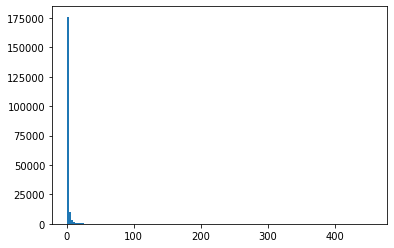

In [31]:
accidentsCounts = dfAccidents.groupby(["osm_id"])["idx"].count()
accidentsCountsDF = pd.DataFrame()
accidentsCountsDF['osm_id'] = accidentsCounts.index
accidentsCountsDF['numReports'] = accidentsCounts.values
plt.hist(accidentsCountsDF.numReports, bins=150)
plt.show()

In [32]:
segmentsCountsDF

,osm_id,numReports
28855,25719318,44295
178738,184348432,39799
3597,10231241,37445
16199,23052441,36738
258686,377981558,34296
...,...,...
123106,104025296,1
219012,264274710,1
219017,264294605,1
219021,264314113,1


In [33]:
accidentsCountsDF

,osm_id,numReports
0,-7522433.0,2
1,2574.0,41
2,85076.0,8
3,101568.0,2
4,101575.0,1
...,...,...
194472,538800145.0,3
194473,538829527.0,1
194474,538840683.0,2
194475,538841153.0,1


## Compute the dangerousness of the road segments
Merging the segments counts and the accidents counts DFs

In [34]:
counts = pd.merge(segmentsCountsDF, accidentsCountsDF, how = "outer", on="osm_id", suffixes=('Traffic','Accidents'))
counts.shape

(423928, 3)

In [35]:
counts

,osm_id,numReportsTraffic,numReportsAccidents
0,25719318.0,44295.0,3.0
1,184348432.0,39799.0,3.0
2,10231241.0,37445.0,NaN
3,23052441.0,36738.0,8.0
4,377981558.0,34296.0,22.0
...,...,...,...
423923,538800145.0,NaN,3.0
423924,538829527.0,NaN,1.0
423925,538840683.0,NaN,2.0
423926,538841153.0,NaN,1.0


In [36]:
counts['dangerousness'] = counts['numReportsAccidents'] / counts['numReportsTraffic']

In [37]:
counts[counts.numReportsTraffic>2].sort_values(['dangerousness'], ascending=False)

,osm_id,numReportsTraffic,numReportsAccidents,dangerousness
209502,31427971.0,5.0,7.0,1.400000
132274,126271441.0,66.0,73.0,1.106061
216099,118327274.0,4.0,4.0,1.000000
224171,97004254.0,3.0,3.0,1.000000
225424,145004930.0,3.0,3.0,1.000000
...,...,...,...,...
229593,150613218.0,3.0,NaN,NaN
229594,83845095.0,3.0,NaN,NaN
229595,261725664.0,3.0,NaN,NaN
229596,47050533.0,3.0,NaN,NaN


In [38]:
counts['osm_id'] = counts['osm_id'].astype(int)

In [39]:
edgesDrive = edgesDrive.rename(columns = {'osmid': 'osm_id'}, inplace = False)

In [40]:
edgesDrive

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key
0,84416296,3,Rue de Tolbiac,secondary,30,False,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,2301459230,0
1,84416296,3,Rue de Tolbiac,secondary,30,False,114.399,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,361704,0
2,3599327,NaN,Rue de Tolbiac,secondary,50,False,100.436,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,253316556,0
3,157910468,NaN,Rue de Tolbiac,secondary,30,False,90.840,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,5487025239,0
4,309765258,5,Avenue d'Italie,primary,50,False,44.575,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,252659093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36785,890090845,NaN,Rue Salneuve,residential,NaN,False,12.310,"LINESTRING (2.31405 48.88599, 2.31403 48.88604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,252969207,0
36786,890987117,NaN,Rue Larmeroux,secondary,30,True,15.399,"LINESTRING (2.27841 48.81501, 2.27848 48.81514)",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060791,8281060792,0
36787,17041550,NaN,Rue Larmeroux,secondary,30,True,45.328,"LINESTRING (2.27848 48.81514, 2.27832 48.81503...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,30730578,0
36788,"[798929041, 51077358]",NaN,Rue Larmeroux,secondary,30,False,328.818,"LINESTRING (2.27848 48.81514, 2.27908 48.81566...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,5225408365,0


In [41]:
counts

,osm_id,numReportsTraffic,numReportsAccidents,dangerousness
0,25719318,44295.0,3.0,0.000068
1,184348432,39799.0,3.0,0.000075
2,10231241,37445.0,NaN,NaN
3,23052441,36738.0,8.0,0.000218
4,377981558,34296.0,22.0,0.000641
...,...,...,...,...
423923,538800145,NaN,3.0,NaN
423924,538829527,NaN,1.0,NaN
423925,538840683,NaN,2.0,NaN
423926,538841153,NaN,1.0,NaN


## Keep only the OSM_ID values which are not in a list and put it to edgesDrive2

In [42]:
edgesDrive2 = edgesDrive[edgesDrive['osm_id'].apply(lambda x: isinstance(x, int))]

In [43]:
edgesDrive2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key
0,84416296,3,Rue de Tolbiac,secondary,30,False,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,2301459230,0
1,84416296,3,Rue de Tolbiac,secondary,30,False,114.399,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,361704,0
2,3599327,NaN,Rue de Tolbiac,secondary,50,False,100.436,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,253316556,0
3,157910468,NaN,Rue de Tolbiac,secondary,30,False,90.840,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,5487025239,0
4,309765258,5,Avenue d'Italie,primary,50,False,44.575,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,252659093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36784,173279350,NaN,Rue Salneuve,residential,NaN,True,176.296,"LINESTRING (2.31405 48.88599, 2.31410 48.88591...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,27234717,0
36785,890090845,NaN,Rue Salneuve,residential,NaN,False,12.310,"LINESTRING (2.31405 48.88599, 2.31403 48.88604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,252969207,0
36786,890987117,NaN,Rue Larmeroux,secondary,30,True,15.399,"LINESTRING (2.27841 48.81501, 2.27848 48.81514)",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060791,8281060792,0
36787,17041550,NaN,Rue Larmeroux,secondary,30,True,45.328,"LINESTRING (2.27848 48.81514, 2.27832 48.81503...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,30730578,0


## Keep only the OSM_ID values which are in a list and put it to edgesDrive3

In [44]:
edgesDrive3 = edgesDrive[~edgesDrive['osm_id'].apply(lambda x: isinstance(x, int))]

In [45]:
edgesDrive3

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key
5,"[298746802, 309765259]",4,Avenue d'Italie,primary,50,False,65.228,"LINESTRING (2.35726 48.82619, 2.35724 48.82629...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,21657548,0
12,"[662481808, 662481807, 748705046, 748705047]",2,Rue de Tolbiac,secondary,50,False,151.750,"LINESTRING (2.35038 48.82581, 2.35020 48.82580...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,1829061660,0
13,"[748705048, 56138076]",3,Rue de Tolbiac,secondary,50,False,173.788,"LINESTRING (2.35038 48.82581, 2.35061 48.82582...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,246998815,0
19,"[513831328, 171930668]",NaN,Rue Vergniaud,residential,"[30, 50]",False,218.555,"LINESTRING (2.34521 48.82595, 2.34524 48.82604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360938,49889201,0
40,"[10427193, 733184763, 244669308]","[2, 3]",Pont Mirabeau,secondary,50,False,26.898,"LINESTRING (2.27694 48.84608, 2.27686 48.84612...",yes,NaN,NaN,NaN,NaN,NaN,NaN,360988,603958290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36738,"[878750779, 878750780, 878750781, 878750775]",NaN,NaN,service,NaN,False,33.894,"LINESTRING (2.37980 48.89313, 2.37969 48.89320...",NaN,NaN,driveway,NaN,customers,NaN,NaN,8175115320,8174727616,0
36739,"[878768260, 878768261]",NaN,NaN,service,NaN,False,116.848,"LINESTRING (2.37532 48.89681, 2.37535 48.89681...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8175285152,7890882158,0
36766,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35814 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,0
36767,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35812 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,1


In [46]:
# for row_id, row in edgesDrive3.iterrows():
#     print(row.osm_id)
#     numRoadSegments = len(row.osm_id)
#     roadLength = row.length
#     for osm_id in row.osm_id:
# #         if osm_id not in edgesDrive2.osm_id:
#         edgesDrive2 = edgesDrive2.append({'osm_id': osm_id, 'length': roadLength/numRoadSegments}, ignore_index=True)

In [47]:
with open ('edgesDrive2.pickle', 'rb') as handle:
    edgesDrive2 = pickle.load(handle)

In [48]:
edgesDrive2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key
0,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.8270,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,2.301459e+09,0.0
1,84416296,3,Rue de Tolbiac,secondary,30,0.0,114.3990,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,3.617040e+05,0.0
2,3599327,NaN,Rue de Tolbiac,secondary,50,0.0,100.4360,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.533166e+08,0.0
3,157910468,NaN,Rue de Tolbiac,secondary,30,0.0,90.8400,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,5.487025e+09,0.0
4,309765258,5,Avenue d'Italie,primary,50,0.0,44.5750,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.526591e+08,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42115,27559577.0,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42116,886944136.0,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42117,27559577.0,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42118,798929041.0,NaN,NaN,NaN,NaN,NaN,164.4090,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
edgesDrive3

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key
5,"[298746802, 309765259]",4,Avenue d'Italie,primary,50,False,65.228,"LINESTRING (2.35726 48.82619, 2.35724 48.82629...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,21657548,0
12,"[662481808, 662481807, 748705046, 748705047]",2,Rue de Tolbiac,secondary,50,False,151.750,"LINESTRING (2.35038 48.82581, 2.35020 48.82580...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,1829061660,0
13,"[748705048, 56138076]",3,Rue de Tolbiac,secondary,50,False,173.788,"LINESTRING (2.35038 48.82581, 2.35061 48.82582...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,246998815,0
19,"[513831328, 171930668]",NaN,Rue Vergniaud,residential,"[30, 50]",False,218.555,"LINESTRING (2.34521 48.82595, 2.34524 48.82604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360938,49889201,0
40,"[10427193, 733184763, 244669308]","[2, 3]",Pont Mirabeau,secondary,50,False,26.898,"LINESTRING (2.27694 48.84608, 2.27686 48.84612...",yes,NaN,NaN,NaN,NaN,NaN,NaN,360988,603958290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36738,"[878750779, 878750780, 878750781, 878750775]",NaN,NaN,service,NaN,False,33.894,"LINESTRING (2.37980 48.89313, 2.37969 48.89320...",NaN,NaN,driveway,NaN,customers,NaN,NaN,8175115320,8174727616,0
36739,"[878768260, 878768261]",NaN,NaN,service,NaN,False,116.848,"LINESTRING (2.37532 48.89681, 2.37535 48.89681...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8175285152,7890882158,0
36766,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35814 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,0
36767,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35812 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,1


In [50]:
counts

,osm_id,numReportsTraffic,numReportsAccidents,dangerousness
0,25719318,44295.0,3.0,0.000068
1,184348432,39799.0,3.0,0.000075
2,10231241,37445.0,NaN,NaN
3,23052441,36738.0,8.0,0.000218
4,377981558,34296.0,22.0,0.000641
...,...,...,...,...
423923,538800145,NaN,3.0,NaN
423924,538829527,NaN,1.0,NaN
423925,538840683,NaN,2.0,NaN
423926,538841153,NaN,1.0,NaN


In [51]:
edgesDrive2['osm_id'] = edgesDrive2['osm_id'].astype(int)

In [52]:
counts

,osm_id,numReportsTraffic,numReportsAccidents,dangerousness
0,25719318,44295.0,3.0,0.000068
1,184348432,39799.0,3.0,0.000075
2,10231241,37445.0,NaN,NaN
3,23052441,36738.0,8.0,0.000218
4,377981558,34296.0,22.0,0.000641
...,...,...,...,...
423923,538800145,NaN,3.0,NaN
423924,538829527,NaN,1.0,NaN
423925,538840683,NaN,2.0,NaN
423926,538841153,NaN,1.0,NaN


## Merge edgesDrive2 with counts dataframe

In [53]:
edgesDrive2 = pd.merge(edgesDrive2, counts, on = 'osm_id')

In [54]:
edgesDrive2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,...,tunnel,access,junction,ref,u,v,key,numReportsTraffic,numReportsAccidents,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.827000,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,...,NaN,NaN,NaN,NaN,3.609300e+05,2.301459e+09,0.0,2573.0,42.0,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,0.0,114.399000,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,...,NaN,NaN,NaN,NaN,3.609300e+05,3.617040e+05,0.0,2573.0,42.0,0.016323
2,84416296,3,Rue de Tolbiac,secondary,30,0.0,114.399000,"LINESTRING (2.35996 48.82616, 2.36029 48.82618...",NaN,NaN,...,NaN,NaN,NaN,NaN,3.617040e+05,3.609300e+05,0.0,2573.0,42.0,0.016323
3,84416296,3,Rue de Tolbiac,secondary,30,0.0,127.266000,"LINESTRING (2.36356 48.82663, 2.36339 48.82660...",NaN,NaN,...,NaN,NaN,NaN,NaN,4.806901e+08,2.301459e+09,0.0,2573.0,42.0,0.016323
4,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.827000,"LINESTRING (2.36186 48.82639, 2.36150 48.82635)",NaN,NaN,...,NaN,NaN,NaN,NaN,2.301459e+09,3.609300e+05,0.0,2573.0,42.0,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31923,159314594,NaN,NaN,NaN,NaN,NaN,26.855000,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026.0,3.0,0.002924
31924,109655133,NaN,NaN,NaN,NaN,NaN,89.927667,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,446.0,NaN,NaN
31925,109655055,NaN,NaN,NaN,NaN,NaN,89.927667,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,713.0,NaN,NaN
31926,29065432,NaN,NaN,NaN,NaN,NaN,85.685667,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8836.0,1.0,0.000113


## Handling missing values in edgesDrive2 dataframe

In [55]:
# Sum_dangerousness = edgesDrive2['dangerousness'].sum()
# r = edgesDrive2['dangerousness'].count()
# Mean_dangerousness = Sum_dangerousness/r

# edgesDrive2['dangerousness'] = edgesDrive2['dangerousness'].fillna(value=Mean_dangerousness)

# edgesDrive2

In [56]:
# r

In [57]:
# Mean_dangerousness

In [58]:
edgesDrive3

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key
5,"[298746802, 309765259]",4,Avenue d'Italie,primary,50,False,65.228,"LINESTRING (2.35726 48.82619, 2.35724 48.82629...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,21657548,0
12,"[662481808, 662481807, 748705046, 748705047]",2,Rue de Tolbiac,secondary,50,False,151.750,"LINESTRING (2.35038 48.82581, 2.35020 48.82580...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,1829061660,0
13,"[748705048, 56138076]",3,Rue de Tolbiac,secondary,50,False,173.788,"LINESTRING (2.35038 48.82581, 2.35061 48.82582...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,246998815,0
19,"[513831328, 171930668]",NaN,Rue Vergniaud,residential,"[30, 50]",False,218.555,"LINESTRING (2.34521 48.82595, 2.34524 48.82604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360938,49889201,0
40,"[10427193, 733184763, 244669308]","[2, 3]",Pont Mirabeau,secondary,50,False,26.898,"LINESTRING (2.27694 48.84608, 2.27686 48.84612...",yes,NaN,NaN,NaN,NaN,NaN,NaN,360988,603958290,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36738,"[878750779, 878750780, 878750781, 878750775]",NaN,NaN,service,NaN,False,33.894,"LINESTRING (2.37980 48.89313, 2.37969 48.89320...",NaN,NaN,driveway,NaN,customers,NaN,NaN,8175115320,8174727616,0
36739,"[878768260, 878768261]",NaN,NaN,service,NaN,False,116.848,"LINESTRING (2.37532 48.89681, 2.37535 48.89681...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8175285152,7890882158,0
36766,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35814 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,0
36767,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35812 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,1


In [59]:
edgesDrive2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,...,tunnel,access,junction,ref,u,v,key,numReportsTraffic,numReportsAccidents,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.827000,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,...,NaN,NaN,NaN,NaN,3.609300e+05,2.301459e+09,0.0,2573.0,42.0,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,0.0,114.399000,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,...,NaN,NaN,NaN,NaN,3.609300e+05,3.617040e+05,0.0,2573.0,42.0,0.016323
2,84416296,3,Rue de Tolbiac,secondary,30,0.0,114.399000,"LINESTRING (2.35996 48.82616, 2.36029 48.82618...",NaN,NaN,...,NaN,NaN,NaN,NaN,3.617040e+05,3.609300e+05,0.0,2573.0,42.0,0.016323
3,84416296,3,Rue de Tolbiac,secondary,30,0.0,127.266000,"LINESTRING (2.36356 48.82663, 2.36339 48.82660...",NaN,NaN,...,NaN,NaN,NaN,NaN,4.806901e+08,2.301459e+09,0.0,2573.0,42.0,0.016323
4,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.827000,"LINESTRING (2.36186 48.82639, 2.36150 48.82635)",NaN,NaN,...,NaN,NaN,NaN,NaN,2.301459e+09,3.609300e+05,0.0,2573.0,42.0,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31923,159314594,NaN,NaN,NaN,NaN,NaN,26.855000,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1026.0,3.0,0.002924
31924,109655133,NaN,NaN,NaN,NaN,NaN,89.927667,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,446.0,NaN,NaN
31925,109655055,NaN,NaN,NaN,NaN,NaN,89.927667,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,713.0,NaN,NaN
31926,29065432,NaN,NaN,NaN,NaN,NaN,85.685667,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8836.0,1.0,0.000113


In [60]:
Speed

,osm_id,weekend,month,hour,year,avg_min_speed,avg_avg_speed,avg_med_speed,avg_max_speed,std_min_speed,std_avg_speed,std_med_speed,std_max_speed,count
0,27627808,0,7,10,2018,54.000000,66.125000,69.000000,75.500000,22.568415,16.301202,18.511257,9.433982,4
1,154794710,1,12,8,2017,9.999999,13.999999,13.000000,18.000000,8.485281,2.828426,4.242639,2.828429,2
2,118240952,0,10,20,2017,18.000000,32.000000,38.000002,47.999999,NaN,NaN,NaN,NaN,1
3,30173873,0,10,14,2017,36.444445,43.222222,50.000000,50.000000,28.262657,20.692860,20.124612,20.124612,9
4,166408696,1,3,12,2018,20.800000,21.933333,22.800000,23.200000,10.158741,9.364235,9.121404,8.671794,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22087519,192903836,1,11,18,2017,4.800001,7.200001,7.200001,8.400000,1.788854,1.788854,1.788854,3.286334,5
22087520,166970054,0,9,22,2018,7.999999,7.999999,7.999999,7.999999,NaN,NaN,NaN,NaN,1
22087521,158858253,0,1,8,2018,0.000000,0.400000,0.000000,2.000000,0.000000,0.565685,0.000000,2.828427,2
22087522,40266592,0,3,12,2018,14.363637,23.695887,25.636363,31.999999,9.790533,8.088466,9.025217,10.039920,11


## Handling missing values in Speed dataframe

In [61]:
# Sum_avg_speed = Speed['avg_avg_speed'].sum()
# r1 = Speed['avg_avg_speed'].count()
# Mean_avg_speed = Sum_avg_speed/r1

# Speed['avg_avg_speed'] = Speed['avg_avg_speed'].fillna(value=Mean_avg_speed)

# Speed

In [62]:
# Mean_avg_speed

In [63]:
# r1

## Merge edgesDrive2 with Speed dataframe on edgesDrive4

In [64]:
edgesDrive4 = pd.merge(edgesDrive2, Speed, on = 'osm_id')

In [65]:
edgesDrive4

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,...,year,avg_min_speed,avg_avg_speed,avg_med_speed,avg_max_speed,std_min_speed,std_avg_speed,std_med_speed,std_max_speed,count
0,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,...,2018,14.000000,20.452381,21.714285,29.428572,17.851237,1.422137e+01,14.716366,14.953897,7
1,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,...,2018,13.272727,21.457576,21.636364,31.818182,10.286796,9.470118e+00,10.800674,11.223352,11
2,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,...,2017,29.000000,29.000000,29.000000,29.000000,29.698486,2.969849e+01,29.698486,29.698486,2
3,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,...,2018,6.857143,16.907143,15.714286,31.142857,9.990472,7.403664e+00,8.280787,3.976120,7
4,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,...,2018,26.000000,32.500000,34.666667,40.666667,17.776389,1.574008e+01,17.473789,13.012814,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5261012,246685173,NaN,NaN,NaN,NaN,NaN,13.305,None,NaN,NaN,...,2017,19.555556,24.500000,26.444444,27.333333,18.021592,2.348670e+01,26.697898,28.757607,9
5261013,246685173,NaN,NaN,NaN,NaN,NaN,13.305,None,NaN,NaN,...,2017,4.000000,5.500000,6.000001,7.000000,0.000000,6.363961e-07,0.000000,1.414212,2
5261014,246685173,NaN,NaN,NaN,NaN,NaN,13.305,None,NaN,NaN,...,2018,20.000002,23.000000,25.999999,25.999999,NaN,NaN,NaN,NaN,1
5261015,246685173,NaN,NaN,NaN,NaN,NaN,13.305,None,NaN,NaN,...,2018,43.999999,43.999999,43.999999,43.999999,NaN,NaN,NaN,NaN,1


In [66]:
edgesDrive4 = edgesDrive4[['osm_id', 'length', 'dangerousness', 'avg_avg_speed', 'u', 'v']]

In [67]:
edgesDrive4

,osm_id,length,dangerousness,avg_avg_speed,u,v
0,84416296,26.827,0.016323,20.452381,360930.0,2.301459e+09
1,84416296,26.827,0.016323,21.457576,360930.0,2.301459e+09
2,84416296,26.827,0.016323,29.000000,360930.0,2.301459e+09
3,84416296,26.827,0.016323,16.907143,360930.0,2.301459e+09
4,84416296,26.827,0.016323,32.500000,360930.0,2.301459e+09
...,...,...,...,...,...,...
5261012,246685173,13.305,0.003831,24.500000,NaN,NaN
5261013,246685173,13.305,0.003831,5.500000,NaN,NaN
5261014,246685173,13.305,0.003831,23.000000,NaN,NaN
5261015,246685173,13.305,0.003831,43.999999,NaN,NaN


## Compute the average time for the merged dataframe

In [68]:
avg_time = edgesDrive4['length'] / edgesDrive4['avg_avg_speed']

In [69]:
avg_time
avg_time = pd.DataFrame(avg_time)

In [70]:
avg_time

,0
0,1.311681
1,1.250234
2,0.925069
3,1.586726
4,0.825446
...,...
5261012,0.543061
5261013,2.419091
5261014,0.578478
5261015,0.302386


In [71]:
edgesDrive4.insert(4, 'avg_time', avg_time)

In [72]:
edgesDrive4['avg_time']

0          1.311681
1          1.250234
2          0.925069
3          1.586726
4          0.825446
             ...   
5261012    0.543061
5261013    2.419091
5261014    0.578478
5261015    0.302386
5261016    0.511731
Name: avg_time, Length: 5261017, dtype: float64

In [73]:
edgesDrive4

,osm_id,length,dangerousness,avg_avg_speed,avg_time,u,v
0,84416296,26.827,0.016323,20.452381,1.311681,360930.0,2.301459e+09
1,84416296,26.827,0.016323,21.457576,1.250234,360930.0,2.301459e+09
2,84416296,26.827,0.016323,29.000000,0.925069,360930.0,2.301459e+09
3,84416296,26.827,0.016323,16.907143,1.586726,360930.0,2.301459e+09
4,84416296,26.827,0.016323,32.500000,0.825446,360930.0,2.301459e+09
...,...,...,...,...,...,...,...
5261012,246685173,13.305,0.003831,24.500000,0.543061,NaN,NaN
5261013,246685173,13.305,0.003831,5.500000,2.419091,NaN,NaN
5261014,246685173,13.305,0.003831,23.000000,0.578478,NaN,NaN
5261015,246685173,13.305,0.003831,43.999999,0.302386,NaN,NaN


## Print the details for all the accidents of a particular road segment

In [74]:
for accidentID in characteristicsDF[characteristicsDF.osm_id==24621816].Num_Acc.values:
    printAccidentDescription(accidentID)
    print("\n")

Accident Description
Num_Acc: 200500009244
Date: 24/2/5 - Time 1015
Lighting Condition: Full day
Type of intersection: Out of intersection
Atmospheric Condition: Overcast
Type of collision: Other collision


Accident Description
Num_Acc: 200500016864
Date: 7/3/5 - Time 850
Lighting Condition: Full day
Type of intersection: Out of intersection
Atmospheric Condition: Normal
Type of collision: Three vehicles and more - in chain


Accident Description
Num_Acc: 200500016875
Date: 29/3/5 - Time 2100
Lighting Condition: Twilight or dawn
Type of intersection: Out of intersection
Atmospheric Condition: Normal
Type of collision: Other collision


Accident Description
Num_Acc: 200500021324
Date: 1/4/5 - Time 1710
Lighting Condition: Full day
Type of intersection: Out of intersection
Atmospheric Condition: Normal
Type of collision: Two vehicles - from the rear


Accident Description
Num_Acc: 200500035848
Date: 18/6/5 - Time 2315
Lighting Condition: Night with public lighting on
Type of intersectio

In [75]:
countsSelected = counts[(counts.dangerousness>0.02) & (counts.dangerousness<1) & (counts.numReportsTraffic > 500)].sort_values(["numReportsTraffic"], ascending=False)
osm_ids_dangerous = countsSelected.osm_id.values
pathsDangerous = {}
for osmWay in osm_ids_dangerous:
    try:
        if osmWay in paths.keys():
            path = paths[osmWay]
            pathsDangerous[osmWay] = path
        else:
            path = get_osmWayPath(osmWay)
            paths[osmWay] = path
            pathsDangerous[osmWay] = path
    except:
        print("problem with %d" %osmWay)

m = folium.Map(path.iloc[:,[0,1]].mean(), zoom_start=13)

for osmWay in pathsDangerous:
    path = pathsDangerous[osmWay]
    # gmap.scatter(path.iloc[1:-1,0], path.iloc[1:-1,1], 'cornflowerblue', marker=True)
    m.add_child(folium.PolyLine(path.iloc[:,[0,1]], color = 'cyan'))
#     gmap.scatter([path.iloc[0,0]], [path.iloc[0,1]], 'green', marker=True)
#     gmap.plot(path.iloc[:,0], path.iloc[:,1], 'cornflowerblue', edge_width=9)
display(m)
# gmap.draw("pathsDangerous.html")
countsSelected

problem with 156620486
problem with 37775878
problem with 156617866
problem with 4039861
problem with 197513489
problem with 51336945
problem with 149902599
problem with 29873622
problem with 23754836
problem with 22715945
problem with 41584738
problem with 310553005
problem with 90654569
problem with 164384927
problem with 25470077
problem with 156622129
problem with 87538650
problem with 4039061
problem with 378989503
problem with 172669799
problem with 37106047
problem with 337853045
problem with 4039877
problem with 131297913
problem with 20108910
problem with 176650401
problem with 21897510
problem with 25485120
problem with 131297907
problem with 56138076
problem with 34393776
problem with 41872851
problem with 13868993
problem with 4573503
problem with 231549025
problem with 53799097
problem with 96936183
problem with 4040540
problem with 156382090
problem with 162384241
problem with 175066770
problem with 197635876
problem with 21346517
problem with 164379452
problem with 56065

,osm_id,numReportsTraffic,numReportsAccidents,dangerousness
1206,156620486,7236.0,165.0,0.022803
1562,37775878,6237.0,133.0,0.021324
1933,156617866,5586.0,241.0,0.043144
2151,4039861,5261.0,159.0,0.030222
2170,197513489,5241.0,136.0,0.025949
...,...,...,...,...
52916,124982133,512.0,20.0,0.039062
53200,24036981,508.0,12.0,0.023622
53222,318442174,508.0,14.0,0.027559
53255,4262892,507.0,12.0,0.023669


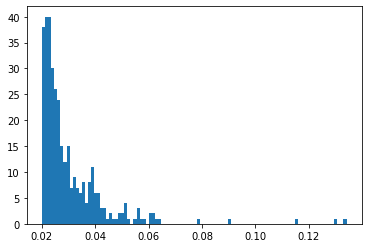

In [76]:
plt.hist(counts.dangerousness[(counts.dangerousness>0.02) & (counts.dangerousness<1) & (counts.numReportsTraffic > 500)],bins=100)
plt.show()

In [77]:
edgesDrive2[['osm_id','u','v']]

,osm_id,u,v
0,84416296,3.609300e+05,2.301459e+09
1,84416296,3.609300e+05,3.617040e+05
2,84416296,3.617040e+05,3.609300e+05
3,84416296,4.806901e+08,2.301459e+09
4,84416296,2.301459e+09,3.609300e+05
...,...,...,...
31923,159314594,NaN,NaN
31924,109655133,NaN,NaN
31925,109655055,NaN,NaN
31926,29065432,NaN,NaN


In [78]:
# Str = random.randint(10,40)
# edgesDrive4 = edgesDrive4.fillna(Str)
# edgesDrive4

## Load the Graph for the Bounding box if it not exists then download it

In [79]:
# %%time
# pathToData = './'
# if not os.path.exists(pathToData + "dataExtracted/"):
#     os.makedirs(pathToData + "dataExtracted/")
# try:
#     G_Drive = pickle.load(open(pathToData + "dataExtracted/" + "G_Drive.pickle", 'rb'))
# except:
#     G_Drive = ox.graph_from_bbox(north=north, south=south, west=west, east=east, network_type='drive_service')
#     pickle.dump(G_Drive,open(pathToData + "dataExtracted/" + "G_Drive.pickle", 'wb'))
# nodesDrive, edgesDrive4 = ox.graph_to_gdfs(G_Drive)
# nodesCoords = nodesDrive[['y', 'x']]
# tree = KDTree(nodesCoords, metric='euclidean')

## Insertion of e.g. the accident rate weight into every single edge of the graph

In [80]:
%%time
df = pd.DataFrame(edgesDrive)
for index, row in df.iterrows():
    Str = random.randint(10,40)
    x = row ['u']
    y = row ['v']
    G_Drive[x][y][0]["accident_rate"] = Str

Wall time: 3.76 s


In [81]:
ox.graph_to_gdfs(G_Drive)

(                    y         x       osmid          highway  ref  \
 360930      48.826346  2.361498      360930              NaN  NaN   
 360932      48.826185  2.357263      360932  traffic_signals  NaN   
 360933      48.826075  2.355218      360933              NaN  NaN   
 360935      48.825812  2.350378      360935  traffic_signals  NaN   
 360937      48.825755  2.346587      360937  traffic_signals  NaN   
 ...               ...       ...         ...              ...  ...   
 8271283014  48.896816  2.264619  8271283014              NaN  NaN   
 8273589924  48.885995  2.314046  8273589924              NaN  NaN   
 8281060791  48.815010  2.278407  8281060791              NaN  NaN   
 8281060792  48.815139  2.278485  8281060792              NaN  NaN   
 8286838424  48.856650  2.306754  8286838424              NaN  NaN   
 
                             geometry  
 360930      POINT (2.36150 48.82635)  
 360932      POINT (2.35726 48.82619)  
 360933      POINT (2.35522 48.82607) 

In [82]:
nodes, edges = ox.graph_to_gdfs(G_Drive)

In [83]:
nodes

,y,x,osmid,highway,ref,geometry
360930,48.826346,2.361498,360930,NaN,NaN,POINT (2.36150 48.82635)
360932,48.826185,2.357263,360932,traffic_signals,NaN,POINT (2.35726 48.82619)
360933,48.826075,2.355218,360933,NaN,NaN,POINT (2.35522 48.82607)
360935,48.825812,2.350378,360935,traffic_signals,NaN,POINT (2.35038 48.82581)
360937,48.825755,2.346587,360937,traffic_signals,NaN,POINT (2.34659 48.82575)
...,...,...,...,...,...,...
8271283014,48.896816,2.264619,8271283014,NaN,NaN,POINT (2.26462 48.89682)
8273589924,48.885995,2.314046,8273589924,NaN,NaN,POINT (2.31405 48.88599)
8281060791,48.815010,2.278407,8281060791,NaN,NaN,POINT (2.27841 48.81501)
8281060792,48.815139,2.278485,8281060792,NaN,NaN,POINT (2.27848 48.81514)


In [84]:
d = nodes[["y", "x"]]
d

,y,x
360930,48.826346,2.361498
360932,48.826185,2.357263
360933,48.826075,2.355218
360935,48.825812,2.350378
360937,48.825755,2.346587
...,...,...
8271283014,48.896816,2.264619
8273589924,48.885995,2.314046
8281060791,48.815010,2.278407
8281060792,48.815139,2.278485


In [85]:
# z = d.sample().values

In [86]:
# z

In [87]:
# o = tuple([tuple(row) for row in z])

In [88]:
# source = o[0]

In [89]:
# n = d.sample().values

In [90]:
# n

In [91]:
# m = tuple([tuple(row) for row in n])

In [92]:
# destination = m[0]

In [93]:
# source

In [94]:
# destination

In [95]:
source = 48.8533828, 2.3409582

In [96]:
destination = 48.8275554, 2.3261153

## Give Source and Destination Addresses and perform routing

In [97]:
%%time
source_idx = tree.query([source], k=1, return_distance=False)[0]
destination_idx = tree.query([destination], k=1, return_distance=False)[0]
closest_node_to_source = nodesCoords.iloc[source_idx].index[0]
closest_node_to_destination = nodesCoords.iloc[destination_idx].index[0]
routeGraph = nx.shortest_path(G_Drive, closest_node_to_source, closest_node_to_destination, weight = 'length')

Wall time: 28.6 ms


In [98]:
%%time
G_Drive_dict = nx.convert.to_dict_of_dicts(G_Drive)
G_Drive_dict2 = {}
weight = 'length'
for nodeID1 in G_Drive_dict:
    if nodeID1 not in G_Drive_dict2:
        G_Drive_dict2[nodeID1] = {}
    for nodeID2 in G_Drive_dict[nodeID1]:
        G_Drive_dict2[nodeID1][nodeID2] = G_Drive_dict[nodeID1][nodeID2][0][weight]

Wall time: 37.2 ms


In [99]:
%%time
g = ksp.AdjacencyDict(G_Drive_dict2)

Wall time: 2.39 ms


In [100]:
%%time
ksp.yen(g, closest_node_to_source, closest_node_to_destination)

Wall time: 4.26 s


[{'cost': 3559.0619999999994,
  'path': [25183164,
   25183183,
   25183366,
   25095600,
   367508,
   25095598,
   206091866,
   206091857,
   25183389,
   367505,
   664205947,
   24972376,
   24972375,
   24972373,
   24972333,
   24972336,
   2427003398,
   24984312,
   7470171529,
   5680393151,
   24984293,
   24984294,
   1143095752,
   24984516,
   24984519,
   24984632,
   24984634,
   24984661,
   5337753751,
   24984820,
   24984818,
   788760763,
   788761735,
   788761933,
   247921252,
   471728,
   36466129,
   4732498722,
   430467383,
   7511621729,
   5341542215,
   5983886860,
   510569646,
   510569676,
   5582514993,
   510582029,
   510569722,
   510573326,
   36473602,
   36473759,
   24924006,
   24924005,
   24924004,
   24924007,
   24924003,
   158582619,
   24924002,
   6180929592,
   64127730,
   1363470287,
   1965461276,
   82408897]},
 {'cost': 3567.708,
  'path': [25183164,
   25183183,
   25183366,
   25095600,
   367508,
   25095598,
   206091866,
  

In [101]:
%%time
df = pd.DataFrame(ksp.yen(g, closest_node_to_source, closest_node_to_destination))

Wall time: 4.19 s


In [102]:
%%time
yen_paths = df["path"]

Wall time: 0 ns


In [103]:
%%time
for k in range(len(yen_paths)):
    yen_paths.iloc[k]
    routeGraph = yen_paths.iloc[k]

Wall time: 0 ns


In [104]:
%%time
def plotRouting(route, G, sourceNode, edges, m, color = 'blue', text2 = "", dx=0):
    prevNode = sourceNode
    for nodeID,node in enumerate(route):
        if nodeID > 0:
            if 'geometry' in G[prevNode][node][0].keys():
                #color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                #color = 'blue'
                polyline = [(G[prevNode][node][0]['geometry'].xy[1][i]+dx, G[prevNode][node][0]['geometry'].xy[0][i]+dx) for i in range(len((G[prevNode][node][0]['geometry'].xy[0])))]
                text=G[prevNode][node][0]
                title = 'nodeID: %d'% nodeID +" "+text2
                for key in text:
                    if key != 'geometry' and  key != 'name':
                        try:
                            title += '<br> %s: %s'%(key,text[key])
                        except:
                            print('p')
                m.add_child(folium.PolyLine(polyline, tooltip=title, color=color))
            else:
                #color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                osmID = G[prevNode][node][0]['osmid']
                edge = edges[(edges.osm_id==osmID) & (edges.u ==prevNode) & (edges.v == node)]
                if len(edge) > 0:
                    polyline = [(edge.geometry.iloc[0].xy[1][i]+dx, edge.geometry.iloc[0].xy[0][i]+dx) for i in range(len((edge.geometry.iloc[0].xy[0])))]
                    text=G[prevNode][node][0]
                    title = '(*) nodeID: %d'% nodeID
                    for key in text:
                        if key != 'geometry' and  key != 'name':
                            try:
                                title += 'br %s: %s'%(key,text[key])
                            except:
                                print('p')
                    m.add_child(folium.PolyLine(polyline, color=color, tooltip = str(text)+" "+ text2))
#             RouteIDs = []
#             RouteIDs = RouteIDs.append(node)
        print(node)
        RouteIDs = []
        RouteIDs = RouteIDs.append(node)
        
        prevNode = node
    return m

Wall time: 0 ns


## Plot the Route

In [105]:
%%time
colors = ['black', 'blue', 'brown', 'cyan', 'darkgray', 'gray', 'green', 'lightgray', 'lime', 'magenta', 'olive', 'orange', 'pink', 'purple', 'red', 'teal', 'violet', 'white', 'yellow']
m = folium.Map(location=[(source[0]+destination[0])/2, (source[1]+destination[1])/2], zoom_start=13)

for k in range(1):
    routeGraph = yen_paths.iloc[k]
    color = colors[k%len(colors)]
    df = pd.DataFrame(edgesDrive)
    for index, row in df.iterrows():
        x = row ['u']
        y = row ['v']
        G_Drive[x][y][0]["k"] = k
    m = plotRouting(route=routeGraph, G=G_Drive, sourceNode=source, edges = edgesDrive, m=m, color=color,dx=k*0.00005)
        
display(m)
m.save('mymap.html')

25183164
25183183
25183366
25095600
367508
25095598
206091866
206091857
25183389
367505
664205947
24972376
24972375
24972373
24972333
24972336
2427003398
24984312
7470171529
5680393151
24984293
24984294
1143095752
24984516
24984519
24984632
24984634
24984661
5337753751
24984820
24984818
788760763
788761735
788761933
247921252
471728
36466129
4732498722
430467383
7511621729
5341542215
5983886860
510569646
510569676
5582514993
510582029
510569722
510573326
36473602
36473759
24924006
24924005
24924004
24924007
24924003
158582619
24924002
6180929592
64127730
1363470287
1965461276
82408897


Wall time: 3.74 s


In [106]:
G_Drive[25624011][517915652][0]['osmid']

365158936

In [107]:
edgesDrive4

,osm_id,length,dangerousness,avg_avg_speed,avg_time,u,v
0,84416296,26.827,0.016323,20.452381,1.311681,360930.0,2.301459e+09
1,84416296,26.827,0.016323,21.457576,1.250234,360930.0,2.301459e+09
2,84416296,26.827,0.016323,29.000000,0.925069,360930.0,2.301459e+09
3,84416296,26.827,0.016323,16.907143,1.586726,360930.0,2.301459e+09
4,84416296,26.827,0.016323,32.500000,0.825446,360930.0,2.301459e+09
...,...,...,...,...,...,...,...
5261012,246685173,13.305,0.003831,24.500000,0.543061,NaN,NaN
5261013,246685173,13.305,0.003831,5.500000,2.419091,NaN,NaN
5261014,246685173,13.305,0.003831,23.000000,0.578478,NaN,NaN
5261015,246685173,13.305,0.003831,43.999999,0.302386,NaN,NaN


## Create different JSON files for each random routing

In [108]:
# import json
# import os

# One_Hundred_Routing_OSMIDs_Dataframe = pd.DataFrame()
# each_routing_df = {}
# each_routing_df[i] = pd.DataFrame()

# for i in range(100):
#     # Load the Graph for the Bounding box if it not exists then download it
#     pathToData = './'
#     if not os.path.exists(pathToData + "dataExtracted/"):
#         os.makedirs(pathToData + "dataExtracted/")
#     try:
#         G_Drive = pickle.load(open(pathToData + "dataExtracted/" + "G_Drive.pickle", 'rb'))
#     except:
#         G_Drive = ox.graph_from_bbox(north=north, south=south, west=west, east=east, network_type='drive_service')
#         pickle.dump(G_Drive,open(pathToData + "dataExtracted/" + "G_Drive.pickle", 'wb'))
#     nodesDrive, edgesDrive4 = ox.graph_to_gdfs(G_Drive)
#     nodesCoords = nodesDrive[['y', 'x']]
#     tree = KDTree(nodesCoords, metric='euclidean')


#     # Insertion of e.g. the accident rate weight into every single edge of the graph
#     df = pd.DataFrame(edgesDrive4)
#     for index, row in df.iterrows():
#         Str = random.randint(10,40)
#         x = row ['u']
#         y = row ['v']
#         G_Drive[x][y][0]["accident_rate"] = Str


#     ox.graph_to_gdfs(G_Drive)


#     nodes, edges = ox.graph_to_gdfs(G_Drive)


#     d = nodes[["y", "x"]]


#     z = d.sample().values


#     o = tuple([tuple(row) for row in z])


#     source = o[0]


#     n = d.sample().values


#     m = tuple([tuple(row) for row in n])


#     destination = m[0]


#     # Give Source and Destination Addresses and perform routing
#     source_idx = tree.query([source], k=1, return_distance=False)[0]
#     destination_idx = tree.query([destination], k=1, return_distance=False)[0]
#     closest_node_to_source = nodesCoords.iloc[source_idx].index[0]
#     closest_node_to_destination = nodesCoords.iloc[destination_idx].index[0]
#     routeGraph = nx.shortest_path(G_Drive, closest_node_to_source, closest_node_to_destination, weight = 'accident_rate')


#     G_Drive_dict = nx.convert.to_dict_of_dicts(G_Drive)
#     G_Drive_dict2 = {}
#     weight = 'length'
#     for nodeID1 in G_Drive_dict:
#         if nodeID1 not in G_Drive_dict2:
#             G_Drive_dict2[nodeID1] = {}
#         for nodeID2 in G_Drive_dict[nodeID1]:
#             G_Drive_dict2[nodeID1][nodeID2] = G_Drive_dict[nodeID1][nodeID2][0][weight]


#     g = ksp.AdjacencyDict(G_Drive_dict2)


#     ksp.yen(g, closest_node_to_source, closest_node_to_destination, 10)


#     df = pd.DataFrame(ksp.yen(g, closest_node_to_source, closest_node_to_destination, 10))


#     yen_paths = df["path"]


#     for k in range(len(yen_paths)):
#         yen_paths.iloc[k]
#         routeGraph = yen_paths.iloc[k]


#     def plotRouting(route, G, sourceNode, edges, m, color = 'blue', text2 = "", dx=0):
#         prevNode = sourceNode
#         for nodeID,node in enumerate(route):
#             if nodeID > 0:
#                 if 'geometry' in G[prevNode][node][0].keys():
#                     #color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#                     #color = 'blue'
#                     polyline = [(G[prevNode][node][0]['geometry'].xy[1][i]+dx, G[prevNode][node][0]['geometry'].xy[0][i]+dx) for i in range(len((G[prevNode][node][0]['geometry'].xy[0])))]
#                     text=G[prevNode][node][0]
#                     title = 'nodeID: %d'% nodeID +" "+text2
#                     for key in text:
#                         if key != 'geometry' and  key != 'name':
#                             try:
#                                 title += '<br> %s: %s'%(key,text[key])
#                             except:
#                                 print('p')
#                     m.add_child(folium.PolyLine(polyline, tooltip=title, color=color))
#                 else:
#                     #color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
#                     osmID = G[prevNode][node][0]['osmid']
#                     edge = edges[(edges.osmid==osmID) & (edges.u ==prevNode) & (edges.v == node)]
#                     if len(edge) > 0:
#                         polyline = [(edge.geometry.iloc[0].xy[1][i]+dx, edge.geometry.iloc[0].xy[0][i]+dx) for i in range(len((edge.geometry.iloc[0].xy[0])))]
#                         text=G[prevNode][node][0]
#                         title = '(*) nodeID: %d'% nodeID
#                         for key in text:
#                             if key != 'geometry' and  key != 'name':
#                                 try:
#                                     title += 'br %s: %s'%(key,text[key])
#                                 except:
#                                     print('p')
#                         m.add_child(folium.PolyLine(polyline, color=color, tooltip = str(text)+" "+ text2))

#             prevNode = node
#         return m


#     # Plot the Route
#     colors = ['black', 'blue', 'brown', 'cyan', 'darkgray', 'gray', 'green', 'lightgray', 'lime', 'magenta', 'olive', 'orange', 'pink', 'purple', 'red', 'teal', 'violet', 'white', 'yellow']
#     m = folium.Map(location=[(source[0]+destination[0])/2, (source[1]+destination[1])/2], zoom_start=13)

#     for k in range(1):
#         routeGraph = yen_paths.iloc[k]
#         color = colors[k%len(colors)]
#         df = pd.DataFrame(edgesDrive4)
#         for index, row in df.iterrows():
#             x = row ['u']
#             y = row ['v']
#             G_Drive[x][y][0]["k"] = k
#         m = plotRouting(route=routeGraph, G=G_Drive, sourceNode=source, edges = edgesDrive4, m=m, color=color,dx=k*0.00005)

#     # display(m)
#     # m.save('mymap.html')


# #     import json

#     def save_json(osm_id):
#         with open(r"./OSM_IDs.json", "a+") as file:
#             file.write(json.dumps(osm_id, cls=NumpyEncoder, indent=4) + "\n")


#     class NumpyEncoder(json.JSONEncoder):
#         def default(self, obj):
#             return json.JSONEncoder.default(self, obj)



#     prevNode = None
#     for nodeID,nextNode in enumerate(routeGraph):
#         if prevNode is not None:
#             osm_id = G_Drive[prevNode][nextNode][0]['osmid']
#             with open(r'./Routing_OSM_IDs/OSM_IDs_{0}.json'.format(i), 'a+') as file:
#                 file.write(json.dumps(osm_id, cls=NumpyEncoder, indent=4) + "\n")
#             with open('./Routing_OSM_IDs/OSM_IDs_{0}.json'.format(i)) as f:
#                 OSM_IDs = f.read().splitlines()
#         prevNode = nextNode

## Create Dataframes from each JSON

In [109]:
import json
import os

One_Hundred_Routing_OSMIDs_Dataframe = pd.DataFrame()
each_routing_df = {}
each_routing_df[i] = pd.DataFrame()


for i in range(100):
    with open('./Routing_OSM_IDs/OSM_IDs_{0}.json'.format(i)) as f:
                    OSM_IDs = f.read().splitlines()

    routing_df = {}
    routing_df[i] = pd.DataFrame({'osm_id': [OSM_IDs]})


    # Load the OSM IDs of each route and store it to a dataframe
    lst_col = 'osm_id'
    Routing_OSMIDs_Dataframe = pd.DataFrame({
                      col:np.repeat(routing_df[i][col].values, routing_df[i][lst_col].astype(str).len())
                      for col in routing_df[i].columns.difference([lst_col])
                    }).assign(**{lst_col:np.concatenate(routing_df[i][lst_col].values)})[routing_df[i].columns.tolist()]


    Routing_OSMIDs_Dataframe['osm_id'] = Routing_OSMIDs_Dataframe['osm_id'].map(lambda x: x.lstrip('[],'))


    Routing_OSMIDs_Dataframe = Routing_OSMIDs_Dataframe.replace(',','', regex=True)


    for index, row in Routing_OSMIDs_Dataframe.iterrows():                 #loop through rows of df for further df cleaning
                if row.any() == '':
                    Routing_OSMIDs_Dataframe.drop(index,inplace=True)


    Routing_OSMIDs_Dataframe = Routing_OSMIDs_Dataframe.dropna()
    Routing_OSMIDs_Dataframe.reset_index(drop=True, inplace=True)

    each_routing_df[i] = Routing_OSMIDs_Dataframe

In [110]:
each_routing_df[5]

,osm_id
0,4080702
1,22699203
2,739109840
3,739109839
4,4080703
...,...
137,32553256
138,32553256
139,389438088
140,352995198


In [111]:
edgesDrive4

,osm_id,length,dangerousness,avg_avg_speed,avg_time,u,v
0,84416296,26.827,0.016323,20.452381,1.311681,360930.0,2.301459e+09
1,84416296,26.827,0.016323,21.457576,1.250234,360930.0,2.301459e+09
2,84416296,26.827,0.016323,29.000000,0.925069,360930.0,2.301459e+09
3,84416296,26.827,0.016323,16.907143,1.586726,360930.0,2.301459e+09
4,84416296,26.827,0.016323,32.500000,0.825446,360930.0,2.301459e+09
...,...,...,...,...,...,...,...
5261012,246685173,13.305,0.003831,24.500000,0.543061,NaN,NaN
5261013,246685173,13.305,0.003831,5.500000,2.419091,NaN,NaN
5261014,246685173,13.305,0.003831,23.000000,0.578478,NaN,NaN
5261015,246685173,13.305,0.003831,43.999999,0.302386,NaN,NaN


## Keep 3 digits of the decimal length of edgesDrive4

In [112]:
edgesDrive4['length'] = round(edgesDrive4['length'], 3)

C:\Users\thanm\Desktop\New Folder\nzygouras-mosp_repo-7303837cb17a\mosp-env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Clear edgesDrive4 from duplicates on edgesDrive8

In [113]:
edgesDrive8 = edgesDrive4.drop_duplicates(subset=['osm_id', 'length'])
edgesDrive8 = edgesDrive8.reset_index(drop=True)
edgesDrive8

,osm_id,length,dangerousness,avg_avg_speed,avg_time,u,v
0,84416296,26.827,0.016323,20.452381,1.311681,360930.0,2.301459e+09
1,84416296,114.399,0.016323,20.452381,5.593432,360930.0,3.617040e+05
2,84416296,127.266,0.016323,20.452381,6.222552,480690113.0,2.301459e+09
3,3599327,100.436,0.008229,33.199999,3.025181,360932.0,2.533166e+08
4,3599327,97.165,0.008229,33.199999,2.926657,361704.0,2.533166e+08
...,...,...,...,...,...,...,...
23191,159314594,26.855,0.002924,29.999999,0.895167,NaN,NaN
23192,109655133,89.928,NaN,11.000000,8.175243,NaN,NaN
23193,109655055,89.928,NaN,0.000000,inf,NaN,NaN
23194,29065432,85.686,0.000113,17.000000,5.040333,NaN,NaN


In [114]:
each_routing_df[6]

,osm_id
0,49429176
1,50557194
2,22715942
3,22715942
4,22715942
...,...
98,44843670
99,19388156
100,19388156
101,19388156


## Create 100 Dataframes matching the OSM_IDs of the random routings

In [115]:
edgesDrive11 = {}
edgesDrive11[i] = pd.DataFrame()
number_of_nodes = {}
total_number_of_nodes_df = []
for i in range(100):
    edgesDrive11[i] = pd.merge(edgesDrive8, each_routing_df[i].astype(int), how='right', on = 'osm_id')
    edgesDrive11[i] = edgesDrive11[i].drop_duplicates(subset=['osm_id', 'length'])
    edgesDrive11[i] = edgesDrive11[i].reset_index(drop=True)
    number_of_nodes[i] = len(edgesDrive11[i])
    total_number_of_nodes_df.append(number_of_nodes[i])
total_number_of_nodes_df = pd.DataFrame(total_number_of_nodes_df)

In [116]:
total_number_of_nodes_df.columns= ['number_of_nodes']
total_number_of_nodes_df

,number_of_nodes
0,32
1,102
2,65
3,114
4,123
...,...
95,112
96,163
97,52
98,141


In [117]:
edgesDrive11[4]

,osm_id,length,dangerousness,avg_avg_speed,avg_time,u,v
0,30919215,92.863,NaN,0.000000,inf,249071457.0,3.436953e+08
1,30919215,101.670,NaN,0.000000,inf,249743195.0,3.594394e+09
2,30919215,18.473,NaN,0.000000,inf,343695334.0,3.594394e+09
3,22932033,31.105,0.001481,22.399999,1.388616,249071424.0,6.240580e+09
4,22932033,46.150,0.001481,22.399999,2.060268,249071457.0,2.497434e+08
...,...,...,...,...,...,...,...
118,25463882,59.391,0.023003,13.545455,4.384570,352968987.0,9.426589e+07
119,708726039,NaN,NaN,NaN,NaN,NaN,NaN
120,4041052,36.653,NaN,10.388889,3.528096,21346796.0,1.858778e+08
121,25472706,8.104,NaN,0.000000,inf,NaN,NaN


In [118]:
edgesDrive11[4]['avg_avg_speed']

0       0.000000
1       0.000000
2       0.000000
3      22.399999
4      22.399999
         ...    
118    13.545455
119          NaN
120    10.388889
121     0.000000
122    20.500000
Name: avg_avg_speed, Length: 123, dtype: float64

## Creation of a total dataframe from each one of the 100 random dataframes

In [119]:
total_dataframe = []
for i in range(100):
    row = {}
    r1234567 = edgesDrive11[i]['avg_avg_speed'].count()
    row['avg_speed_mean'] = edgesDrive11[i]['avg_avg_speed'].sum() / r1234567
    r12345678 = edgesDrive11[i]['avg_time'].count()
    row['avg_time_mean'] = edgesDrive11[i]['avg_time'].sum() / r12345678
    r123456789 = edgesDrive11[i]['dangerousness'].count()
    row['dangerousness_mean'] = edgesDrive11[i]['dangerousness'].sum() / r123456789
    row['length_sum'] = edgesDrive11[i]['length'].sum()
    total_dataframe.append(row)
total_dataframe = pd.DataFrame(total_dataframe)

C:\Users\thanm\Desktop\New Folder\nzygouras-mosp_repo-7303837cb17a\mosp-env\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


## Add the number of nodes for each routing

In [120]:
total_dataframe = pd.concat([total_dataframe, total_number_of_nodes_df], axis=1)
total_dataframe

,avg_speed_mean,avg_time_mean,dangerousness_mean,length_sum,number_of_nodes
0,19.376607,4.584860,0.009761,1540.090,32
1,16.350337,5.183935,0.018882,6223.243,102
2,15.664728,5.299617,0.004663,3316.549,65
3,25.438451,3.639770,0.014390,6278.302,114
4,14.658477,inf,0.012671,5601.388,123
...,...,...,...,...,...
95,17.693560,4.716772,0.009829,4756.618,112
96,18.191980,inf,0.009537,7762.735,163
97,13.910440,7.039672,0.011092,2516.646,52
98,16.451301,inf,0.012676,8233.587,141


In [121]:
total_dataframe['avg_time_mean'] = total_dataframe['avg_time_mean'].replace([np.inf, -np.inf], np.nan)
total_dataframe

,avg_speed_mean,avg_time_mean,dangerousness_mean,length_sum,number_of_nodes
0,19.376607,4.584860,0.009761,1540.090,32
1,16.350337,5.183935,0.018882,6223.243,102
2,15.664728,5.299617,0.004663,3316.549,65
3,25.438451,3.639770,0.014390,6278.302,114
4,14.658477,NaN,0.012671,5601.388,123
...,...,...,...,...,...
95,17.693560,4.716772,0.009829,4756.618,112
96,18.191980,NaN,0.009537,7762.735,163
97,13.910440,7.039672,0.011092,2516.646,52
98,16.451301,NaN,0.012676,8233.587,141


In [122]:
r7 = total_dataframe['avg_time_mean'].count()
total_sum_routing_time = total_dataframe['avg_time_mean'].sum()
total_mean_routing_time = total_sum_routing_time/r7

r8 = total_dataframe['dangerousness_mean'].count()
total_sum_dangerousness = total_dataframe['dangerousness_mean'].sum()
total_mean_dangerousness = total_sum_dangerousness/r8

In [123]:
total_mean_routing_time = round(total_mean_routing_time, 6)
total_mean_routing_time

5.799731

In [124]:
total_mean_dangerousness = round(total_mean_dangerousness, 6)
total_mean_dangerousness

0.01134

In [125]:
total_dataframe['avg_time_mean'] = total_dataframe['avg_time_mean'].fillna(value=total_mean_routing_time)
total_dataframe['dangerousness_mean'] = total_dataframe['dangerousness_mean'].fillna(value=total_mean_dangerousness)

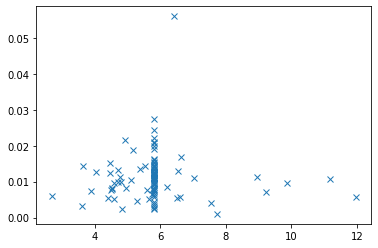

In [126]:
plt.plot(total_dataframe.avg_time_mean, total_dataframe.dangerousness_mean, 'x')
plt.show()

In [127]:
edgesDrive4

,osm_id,length,dangerousness,avg_avg_speed,avg_time,u,v
0,84416296,26.827,0.016323,20.452381,1.311681,360930.0,2.301459e+09
1,84416296,26.827,0.016323,21.457576,1.250234,360930.0,2.301459e+09
2,84416296,26.827,0.016323,29.000000,0.925069,360930.0,2.301459e+09
3,84416296,26.827,0.016323,16.907143,1.586726,360930.0,2.301459e+09
4,84416296,26.827,0.016323,32.500000,0.825446,360930.0,2.301459e+09
...,...,...,...,...,...,...,...
5261012,246685173,13.305,0.003831,24.500000,0.543061,NaN,NaN
5261013,246685173,13.305,0.003831,5.500000,2.419091,NaN,NaN
5261014,246685173,13.305,0.003831,23.000000,0.578478,NaN,NaN
5261015,246685173,13.305,0.003831,43.999999,0.302386,NaN,NaN


In [128]:
edgesDrive8

,osm_id,length,dangerousness,avg_avg_speed,avg_time,u,v
0,84416296,26.827,0.016323,20.452381,1.311681,360930.0,2.301459e+09
1,84416296,114.399,0.016323,20.452381,5.593432,360930.0,3.617040e+05
2,84416296,127.266,0.016323,20.452381,6.222552,480690113.0,2.301459e+09
3,3599327,100.436,0.008229,33.199999,3.025181,360932.0,2.533166e+08
4,3599327,97.165,0.008229,33.199999,2.926657,361704.0,2.533166e+08
...,...,...,...,...,...,...,...
23191,159314594,26.855,0.002924,29.999999,0.895167,NaN,NaN
23192,109655133,89.928,NaN,11.000000,8.175243,NaN,NaN
23193,109655055,89.928,NaN,0.000000,inf,NaN,NaN
23194,29065432,85.686,0.000113,17.000000,5.040333,NaN,NaN


In [129]:
# Sum_u = edgesDrive8['u'].sum()
# r10 = edgesDrive8['u'].count()
# Mean_u = Sum_u/r10

# Sum_v = edgesDrive8['v'].sum()
# r11 = edgesDrive8['v'].count()
# Mean_v = Sum_v/r11

# edgesDrive8['u'] = edgesDrive8['u'].fillna(value=Mean_u)
# edgesDrive8['v'] = edgesDrive8['v'].fillna(value=Mean_v)

# edgesDrive8

In [130]:
# Mean_u

In [131]:
# Mean_v

In [132]:
edgesDrive

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key
0,84416296,3,Rue de Tolbiac,secondary,30,False,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,2301459230,0
1,84416296,3,Rue de Tolbiac,secondary,30,False,114.399,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,361704,0
2,3599327,NaN,Rue de Tolbiac,secondary,50,False,100.436,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,253316556,0
3,157910468,NaN,Rue de Tolbiac,secondary,30,False,90.840,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,5487025239,0
4,309765258,5,Avenue d'Italie,primary,50,False,44.575,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,252659093,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36785,890090845,NaN,Rue Salneuve,residential,NaN,False,12.310,"LINESTRING (2.31405 48.88599, 2.31403 48.88604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,252969207,0
36786,890987117,NaN,Rue Larmeroux,secondary,30,True,15.399,"LINESTRING (2.27841 48.81501, 2.27848 48.81514)",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060791,8281060792,0
36787,17041550,NaN,Rue Larmeroux,secondary,30,True,45.328,"LINESTRING (2.27848 48.81514, 2.27832 48.81503...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,30730578,0
36788,"[798929041, 51077358]",NaN,Rue Larmeroux,secondary,30,False,328.818,"LINESTRING (2.27848 48.81514, 2.27908 48.81566...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,5225408365,0


## Merge edgesDrive with edgesDrive8[['osm_id', 'avg_time', 'dangerousness']] on edgesDrive_merge

In [133]:
edgesDrive23 = edgesDrive8[['osm_id', 'avg_time', 'dangerousness']]

edgesDrive_merge = pd.merge(edgesDrive[edgesDrive['osm_id'].apply(lambda x: isinstance(x, int))], edgesDrive23, on = 'osm_id', how ='left')

edgesDrive_merge = edgesDrive_merge[['osm_id', 'avg_time', 'dangerousness']]

edgesDrive_merge

,osm_id,avg_time,dangerousness
0,84416296,1.311681,0.016323
1,84416296,5.593432,0.016323
2,84416296,6.222552,0.016323
3,84416296,1.311681,0.016323
4,84416296,5.593432,0.016323
...,...,...,...
82577,173279350,11.753067,NaN
82578,890090845,NaN,NaN
82579,890987117,NaN,NaN
82580,17041550,2.483726,0.000727


## Merge edgesDrive_merge with edgesDrive on result

In [134]:
result = edgesDrive.reset_index(drop = True)
result = result.join(edgesDrive_merge.reset_index(drop = True), how = 'left', lsuffix = '_left', rsuffix = '_right')
result = result.rename(index = {k:v for k,v in zip(result.index,edgesDrive.index)})

result = result.rename(columns = {'osm_id_left': 'osm_id'}, inplace = False)

result.drop('osm_id_right', axis=1, inplace=True)

result.replace([np.inf, -np.inf], np.nan, inplace=True)

result

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,False,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,2301459230,0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,False,114.399,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,361704,0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,False,100.436,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,253316556,0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,False,90.840,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,5487025239,0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,False,44.575,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,252659093,0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36785,890090845,NaN,Rue Salneuve,residential,NaN,False,12.310,"LINESTRING (2.31405 48.88599, 2.31403 48.88604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,252969207,0,NaN,NaN
36786,890987117,NaN,Rue Larmeroux,secondary,30,True,15.399,"LINESTRING (2.27841 48.81501, 2.27848 48.81514)",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060791,8281060792,0,NaN,NaN
36787,17041550,NaN,Rue Larmeroux,secondary,30,True,45.328,"LINESTRING (2.27848 48.81514, 2.27832 48.81503...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,30730578,0,NaN,NaN
36788,"[798929041, 51077358]",NaN,Rue Larmeroux,secondary,30,False,328.818,"LINESTRING (2.27848 48.81514, 2.27908 48.81566...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,5225408365,0,NaN,NaN


In [135]:
# result['avg_time'] = result['avg_time'].fillna(value=total_mean_routing_time)
# result['dangerousness'] = result['dangerousness'].fillna(value=total_mean_dangerousness)

r7_primary_length1 = result.loc[result['highway'] == 'primary'].count()
r7_primary_length = r7_primary_length1['avg_time']
r7_primary = result.loc[result['highway'] == 'primary']
r78_primary = r7_primary['avg_time']
primary_sum_routing_time = r78_primary.sum()
primary_mean_routing_time = primary_sum_routing_time/r7_primary_length

r7_secondary_length1 = result.loc[result['highway'] == 'secondary'].count()
r7_secondary_length = r7_secondary_length1['avg_time']
r7_secondary = result.loc[result['highway'] == 'secondary']
r78_secondary = r7_secondary['avg_time']
secondary_sum_routing_time = r78_secondary.sum()
secondary_mean_routing_time = secondary_sum_routing_time/r7_secondary_length

r7_residential_length1 = result.loc[result['highway'] == 'residential'].count()
r7_residential_length = r7_residential_length1['avg_time']
r7_residential = result.loc[result['highway'] == 'residential']
r78_residential = r7_residential['avg_time']
residential_sum_routing_time = r78_residential.sum()
residential_mean_routing_time = residential_sum_routing_time/r7_residential_length

r73_primary_length1 = result.loc[result['highway'] == 'primary'].count()
r73_primary_length = r73_primary_length1['dangerousness']
r73_primary = result.loc[result['highway'] == 'primary']
r783_primary = r73_primary['dangerousness']
primary_sum_dangerousness = r783_primary.sum()
primary_mean_dangerousness = primary_sum_dangerousness/r73_primary_length

r73_secondary_length1 = result.loc[result['highway'] == 'secondary'].count()
r73_secondary_length = r73_secondary_length1['dangerousness']
r73_secondary = result.loc[result['highway'] == 'secondary']
r783_secondary = r73_secondary['dangerousness']
secondary_sum_dangerousness = r783_secondary.sum()
secondary_mean_dangerousness = secondary_sum_dangerousness/r73_secondary_length

r73_residential_length1 = result.loc[result['highway'] == 'residential'].count()
r73_residential_length = r73_residential_length1['dangerousness']
r73_residential = result.loc[result['highway'] == 'residential']
r783_residential = r73_residential['dangerousness']
residential_sum_dangerousness = r783_residential.sum()
residential_mean_dangerousness = residential_sum_dangerousness/r73_residential_length

# result.loc[result['highway'] == 'primary']['avg_time'] = result.loc[result['highway'] == 'primary']['avg_time'].fillna(value=primary_mean_routing_time)
# result.loc[result['highway'] == 'secondary']['avg_time'] = result.loc[result['highway'] == 'secondary']['avg_time'].fillna(value=secondary_mean_routing_time)


# z = result.loc[result['highway'] == 'primary']['avg_time'].fillna(value=primary_mean_routing_time)
# result.loc[0:36790,'avg_time'] = z
# c = result.loc[result['highway'] == 'secondary']['avg_time'].fillna(value=secondary_mean_routing_time)
# result.loc[0:36790,'avg_time'] = c
# m = result.loc[result['highway'] == 'residential']['avg_time'].fillna(value=residential_mean_routing_time)
# result.loc[0:36790,'avg_time'] = m

# n = result.loc[result['highway'] == 'primary']['dangerousness'].fillna(value=primary_mean_dangerousness)
# result.loc[0:36790,'dangerousness'] = n
# b = result.loc[result['highway'] == 'secondary']['dangerousness'].fillna(value=secondary_mean_dangerousness)
# result.loc[0:36790,'dangerousness'] = b
# v = result.loc[result['highway'] == 'residential']['dangerousness'].fillna(value=residential_mean_dangerousness)
# result.loc[0:36790,'dangerousness'] = v

# = result.loc[result['highway'] == 'residential']['avg_time'].fillna(value=residential_mean_routing_time)


# result.loc[result['highway'] == 'primary']['dangerousness'] = result.loc[result['highway'] == 'primary']['dangerousness'].fillna(value=primary_mean_dangerousness)
# result.loc[result['highway'] == 'secondary']['dangerousness'] = result.loc[result['highway'] == 'secondary']['dangerousness'].fillna(value=secondary_mean_dangerousness)
# result.loc[result['highway'] == 'residential']['dangerousness'] = result.loc[result['highway'] == 'residential']['dangerousness'].fillna(value=residential_mean_dangerousness)

# r78_primary = r78_primary.fillna(value=primary_mean_routing_time)
# r78_secondary = r78_secondary.fillna(value=secondary_mean_routing_time)
# r78_residential = r78_residential.fillna(value=residential_mean_routing_time)


# r783_primary = r783_primary.fillna(value=primary_mean_dangerousness)
# r783_secondary = r783_secondary.fillna(value=secondary_mean_dangerousness)
# r783_residential = r783_residential.fillna(value=residential_mean_dangerousness)



# result['avg_time'] = result['avg_time'].fillna(value=total_mean_routing_time)
# result['avg_time'] = result['avg_time'].fillna(value=total_mean_routing_time)
# result['avg_time'] = result['avg_time'].fillna(value=total_mean_routing_time)

# result['dangerousness'] = result['dangerousness'].fillna(value=total_mean_dangerousness)
# result['dangerousness'] = result['dangerousness'].fillna(value=total_mean_dangerousness)
# result['dangerousness'] = result['dangerousness'].fillna(value=total_mean_dangerousness)

# Sum_u = result['u'].sum()
# r10 = result['u'].count()
# Mean_u = Sum_u/r10

# Sum_v = result['v'].sum()
# r11 = result['v'].count()
# Mean_v = Sum_v/r11

# result['u'] = result['u'].fillna(value=Mean_u)
# result['v'] = result['v'].fillna(value=Mean_v)

# result['u'] = result['u'].fillna(value=5)
# result['v'] = result['v'].fillna(value=5)

result

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,False,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,2301459230,0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,False,114.399,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,361704,0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,False,100.436,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,253316556,0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,False,90.840,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,5487025239,0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,False,44.575,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,252659093,0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36785,890090845,NaN,Rue Salneuve,residential,NaN,False,12.310,"LINESTRING (2.31405 48.88599, 2.31403 48.88604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,252969207,0,NaN,NaN
36786,890987117,NaN,Rue Larmeroux,secondary,30,True,15.399,"LINESTRING (2.27841 48.81501, 2.27848 48.81514)",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060791,8281060792,0,NaN,NaN
36787,17041550,NaN,Rue Larmeroux,secondary,30,True,45.328,"LINESTRING (2.27848 48.81514, 2.27832 48.81503...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,30730578,0,NaN,NaN
36788,"[798929041, 51077358]",NaN,Rue Larmeroux,secondary,30,False,328.818,"LINESTRING (2.27848 48.81514, 2.27908 48.81566...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,5225408365,0,NaN,NaN


In [136]:
z = result.loc[result['highway'] == 'primary']['avg_time'].fillna(value=primary_mean_routing_time)
c = result.loc[result['highway'] == 'secondary']['avg_time'].fillna(value=secondary_mean_routing_time)
m = result.loc[result['highway'] == 'residential']['avg_time'].fillna(value=residential_mean_routing_time)

df3 = pd.concat([z, c], axis=1, ignore_index=False, sort=True)
df3 = df3.bfill(axis=1).iloc[:, 0]
df4 = pd.concat([df3, m], axis=1, ignore_index=False, sort=True)
df4 = df4.bfill(axis=1).iloc[:, 0]

result['avg_time'] = df4
result['avg_time'] = round(result['avg_time'], 6)

n = result.loc[result['highway'] == 'primary']['dangerousness'].fillna(value=primary_mean_dangerousness)
b = result.loc[result['highway'] == 'secondary']['dangerousness'].fillna(value=secondary_mean_dangerousness)
v = result.loc[result['highway'] == 'residential']['dangerousness'].fillna(value=residential_mean_dangerousness)

df5 = pd.concat([n, b], axis=1, ignore_index=False, sort=True)
df5 = df5.bfill(axis=1).iloc[:, 0]
df6 = pd.concat([df5, v], axis=1, ignore_index=False, sort=True)
df6 = df6.bfill(axis=1).iloc[:, 0]

result['dangerousness'] = df6
result['dangerousness'] = round(result['dangerousness'], 6)

In [137]:
z

4        5.593432
5        6.222552
41       2.787589
46       3.177990
47       0.804427
           ...   
36650    6.013833
36728    8.051093
36737    8.051093
36748    8.051093
36780    8.051093
Name: avg_time, Length: 3708, dtype: float64

In [138]:
c

0         1.311681
1         5.593432
2         6.222552
3         1.311681
6         3.025181
           ...    
36771    17.810252
36783     8.307374
36786     8.307374
36787     8.307374
36788     8.307374
Name: avg_time, Length: 4512, dtype: float64

In [139]:
m

7         2.926657
10        5.129611
15       17.980051
17        3.365337
19        5.807586
           ...    
36778     8.974007
36779     8.974007
36784     8.974007
36785     8.974007
36789     8.974007
Name: avg_time, Length: 14645, dtype: float64

In [140]:
n

4        0.016323
5        0.016323
41       0.001072
46       0.011017
47       0.011017
           ...   
36650    0.013723
36728    0.013723
36737    0.013723
36748    0.013723
36780    0.013723
Name: dangerousness, Length: 3708, dtype: float64

In [141]:
b

0        0.016323
1        0.016323
2        0.016323
3        0.016323
6        0.008229
           ...   
36771    0.014251
36783    0.014251
36786    0.014251
36787    0.014251
36788    0.014251
Name: dangerousness, Length: 4512, dtype: float64

In [142]:
v

7        0.008229
10       0.007871
15       0.002688
17       0.005946
19       0.003759
           ...   
36778    0.013574
36779    0.013574
36784    0.013574
36785    0.013574
36789    0.013574
Name: dangerousness, Length: 14645, dtype: float64

In [143]:
df4

0        1.311681
1        5.593432
2        6.222552
3        1.311681
4        5.593432
           ...   
36785    8.974007
36786    8.307374
36787    8.307374
36788    8.307374
36789    8.974007
Name: avg_time, Length: 22865, dtype: float64

In [144]:
df6

0        0.016323
1        0.016323
2        0.016323
3        0.016323
4        0.016323
           ...   
36785    0.013574
36786    0.014251
36787    0.014251
36788    0.014251
36789    0.013574
Name: dangerousness, Length: 22865, dtype: float64

In [145]:
result

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,False,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,2301459230,0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,False,114.399,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,361704,0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,False,100.436,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,253316556,0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,False,90.840,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,5487025239,0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,False,44.575,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,252659093,0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36785,890090845,NaN,Rue Salneuve,residential,NaN,False,12.310,"LINESTRING (2.31405 48.88599, 2.31403 48.88604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,252969207,0,8.974007,0.013574
36786,890987117,NaN,Rue Larmeroux,secondary,30,True,15.399,"LINESTRING (2.27841 48.81501, 2.27848 48.81514)",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060791,8281060792,0,8.307374,0.014251
36787,17041550,NaN,Rue Larmeroux,secondary,30,True,45.328,"LINESTRING (2.27848 48.81514, 2.27832 48.81503...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,30730578,0,8.307374,0.014251
36788,"[798929041, 51077358]",NaN,Rue Larmeroux,secondary,30,False,328.818,"LINESTRING (2.27848 48.81514, 2.27908 48.81566...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,5225408365,0,8.307374,0.014251


In [146]:
result['osm_id']

0                     84416296
1                     84416296
2                      3599327
3                    157910468
4                    309765258
                 ...          
36785                890090845
36786                890987117
36787                 17041550
36788    [798929041, 51077358]
36789                891574207
Name: osm_id, Length: 36790, dtype: object

In [147]:
primary_mean_routing_time

8.051092766921052

In [148]:
secondary_mean_routing_time

8.30737370984367

In [149]:
residential_mean_routing_time

8.974006628725071

In [150]:
primary_mean_dangerousness

0.01372272023547254

In [151]:
secondary_mean_dangerousness

0.014250559480079559

In [152]:
residential_mean_dangerousness

0.013573693583798159

In [153]:
r7_primary_length

3293

In [154]:
primary_sum_routing_time

26512.248481471022

In [155]:
# Mean_u

In [156]:
# Mean_v

## Add "time" and "dangerousness" weights to every edge in a slider-wise manner on edgesDrive_weighted derived from result dataframe

In [157]:
edgesDrive_weighted = pd.DataFrame(result)

for index, row in edgesDrive_weighted.iterrows():
    for i in np.arange(0.000000, 16/16, 1/16):
        x = row ['u']
        y = row ['v']
        G_Drive[x][y][0]["time_and_dangerousness_weight_{}".format(i)] = i * (edgesDrive_weighted['avg_time'][index] / total_mean_routing_time) + (1 - i) * (edgesDrive_weighted['dangerousness'][index] / total_mean_dangerousness)

In [158]:
G_Drive.get_edge_data(x,y)

{0: {'osmid': 891574207,
  'oneway': True,
  'name': 'Rue du Champ de Mars',
  'highway': 'residential',
  'maxspeed': '30',
  'length': 26.28,
  'geometry': <shapely.geometry.linestring.LineString at 0x229f2d9e780>,
  'accident_rate': 22,
  'k': 0,
  'time_and_dangerousness_weight_0.0': 1.1970017636684303,
  'time_and_dangerousness_weight_0.0625': 1.2188963002878606,
  'time_and_dangerousness_weight_0.125': 1.240790836907291,
  'time_and_dangerousness_weight_0.1875': 1.2626853735267214,
  'time_and_dangerousness_weight_0.25': 1.284579910146152,
  'time_and_dangerousness_weight_0.3125': 1.3064744467655822,
  'time_and_dangerousness_weight_0.375': 1.3283689833850127,
  'time_and_dangerousness_weight_0.4375': 1.350263520004443,
  'time_and_dangerousness_weight_0.5': 1.3721580566238734,
  'time_and_dangerousness_weight_0.5625': 1.3940525932433039,
  'time_and_dangerousness_weight_0.625': 1.4159471298627344,
  'time_and_dangerousness_weight_0.6875': 1.4378416664821647,
  'time_and_dangerou

In [159]:
len(G_Drive)

18298

In [160]:
edgesDrive_weighted

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,False,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,2301459230,0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,False,114.399,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,361704,0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,False,100.436,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,253316556,0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,False,90.840,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,5487025239,0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,False,44.575,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,252659093,0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36785,890090845,NaN,Rue Salneuve,residential,NaN,False,12.310,"LINESTRING (2.31405 48.88599, 2.31403 48.88604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,252969207,0,8.974007,0.013574
36786,890987117,NaN,Rue Larmeroux,secondary,30,True,15.399,"LINESTRING (2.27841 48.81501, 2.27848 48.81514)",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060791,8281060792,0,8.307374,0.014251
36787,17041550,NaN,Rue Larmeroux,secondary,30,True,45.328,"LINESTRING (2.27848 48.81514, 2.27832 48.81503...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,30730578,0,8.307374,0.014251
36788,"[798929041, 51077358]",NaN,Rue Larmeroux,secondary,30,False,328.818,"LINESTRING (2.27848 48.81514, 2.27908 48.81566...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,5225408365,0,8.307374,0.014251


In [161]:
if os.path.isfile('OSM_IDs_of_each_routing.json'):
    os.remove('OSM_IDs_of_each_routing.json')

## Perform a maximum of 3 routings in a slider-wise manner on edgesDrive_weighted

In [162]:
# Insertion of e.g. the accident rate weight into every single edge of the graph
# df = pd.DataFrame(result)
# for index, row in df.iterrows():
#     Str = random.randint(10,40)
#     x = row ['u']
#     y = row ['v']
#     G_Drive[x][y][0]["accident_rate"] = Str
    
ox.graph_to_gdfs(G_Drive)

nodes, edges = ox.graph_to_gdfs(G_Drive)

nodes

d = nodes[["y", "x"]]
d

# z = d.sample().values

# z

# o = tuple([tuple(row) for row in z])

# source = o[0]

# n = d.sample().values

# n

# m = tuple([tuple(row) for row in n])

# destination = m[0]

# source

# destination

source = 48.8995345, 2.3998338

destination = 48.9884373, 2.4885188

# Give Source and Destination Addresses and perform routing
source_idx = tree.query([source], k=1, return_distance=False)[0]
destination_idx = tree.query([destination], k=1, return_distance=False)[0]
closest_node_to_source = nodesCoords.iloc[source_idx].index[0]
closest_node_to_destination = nodesCoords.iloc[destination_idx].index[0]
routeGraph = nx.shortest_path(G_Drive, closest_node_to_source, closest_node_to_destination, weight = 'length')

G_Drive_dict = nx.convert.to_dict_of_dicts(G_Drive)
G_Drive_dict2 = {}
weight = 'time_and_dangerousness_weight_0.5'
for nodeID1 in G_Drive_dict:
    if nodeID1 not in G_Drive_dict2:
        G_Drive_dict2[nodeID1] = {}
    for nodeID2 in G_Drive_dict[nodeID1]:
        G_Drive_dict2[nodeID1][nodeID2] = G_Drive_dict[nodeID1][nodeID2][0][weight]
        
g = ksp.AdjacencyDict(G_Drive_dict2)

ksp.yen(g, closest_node_to_source, closest_node_to_destination)

df = pd.DataFrame(ksp.yen(g, closest_node_to_source, closest_node_to_destination))

yen_paths = df["path"]

for k in range(len(yen_paths)):
    yen_paths.iloc[k]
    routeGraph = yen_paths.iloc[k]
    
def plotRouting(route, G, sourceNode, edges, m, color = 'blue', text2 = "", dx=0):
    prevNode = sourceNode
    for nodeID,node in enumerate(route):
        if nodeID > 0:
            if 'geometry' in G[prevNode][node][0].keys():
                #color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                #color = 'blue'
                polyline = [(G[prevNode][node][0]['geometry'].xy[1][i]+dx, G[prevNode][node][0]['geometry'].xy[0][i]+dx) for i in range(len((G[prevNode][node][0]['geometry'].xy[0])))]
                text=G[prevNode][node][0]
                title = 'nodeID: %d'% nodeID +" "+text2
                for key in text:
                    if key != 'geometry' and  key != 'name':
                        try:
                            title += '<br> %s: %s'%(key,text[key])
                        except:
                            print('p')
                m.add_child(folium.PolyLine(polyline, tooltip=title, color=color))
            else:
                #color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                osmID = G[prevNode][node][0]['osmid']
                edge = edges[(edges.osm_id==osmID) & (edges.u ==prevNode) & (edges.v == node)]
                if len(edge) > 0:
                    polyline = [(edge.geometry.iloc[0].xy[1][i]+dx, edge.geometry.iloc[0].xy[0][i]+dx) for i in range(len((edge.geometry.iloc[0].xy[0])))]
                    text=G[prevNode][node][0]
                    title = '(*) nodeID: %d'% nodeID
                    for key in text:
                        if key != 'geometry' and  key != 'name':
                            try:
                                title += 'br %s: %s'%(key,text[key])
                            except:
                                print('p')
                    m.add_child(folium.PolyLine(polyline, color=color, tooltip = str(text)+" "+ text2))
#                 print(G[prevNode][node][0]['osmid'])
#             RouteIDs = []
#             RouteIDs = RouteIDs.append(node)
#         print(node)
#         print(osmID)
            osmID678 = G[prevNode][node][0]['osmid']
            length = G[prevNode][node][0]['length']
            mydict = {'osm_id': [osmID678], 'length': length}
            routing = pd.DataFrame([mydict])
            routing23 = routing[~routing['osm_id'].apply(lambda x: isinstance(x, int))]
            routing2 = pd.DataFrame()
            for row_id, row in routing23.iterrows():
#                 print(row)
                numRoadSegments = len(row.osm_id)
                roadLength = row.length
                for osm_id in row.osm_id:
                    if isinstance(osm_id, list):
                        numRoadSegments2 = len(osm_id)
#                         roadLength2 = osm_id.length
                        for i in range(len(osm_id)):
                            mydict2 = {'osm_id': osm_id[i], 'length': roadLength/numRoadSegments2}
                            routing2 = routing2.append([mydict2], ignore_index=True)
                    else:
                        mydict2 = {'osm_id': osm_id, 'length': roadLength/numRoadSegments}
                        routing2 = routing2.append([mydict2], ignore_index=True)

#             print(routing2)
            
            

            def save_json(routing2):
                with open(r"./OSM_IDs_of_each_routing.json", "a+") as file:
#                     routing2.to_json('temp.json', orient='records', lines=True)
                    file.write(json.dumps(json.loads(routing2.to_json(orient="records")), cls=NumpyEncoder, indent=4) + "\n")
#                     f.write(routing2.to_json(orient='records', lines=True, cls=NumpyEncoder, indent=4) + "\n")
                    
#             def save_json(route_length):
#                 with open(r"./Length_of_each_routing.json", "a+") as file:
#                     file.write(json.dumps(route_length, cls=NumpyEncoder, indent=4) + "\n")


            class NumpyEncoder(json.JSONEncoder):
                def default(self, obj):
                    return json.JSONEncoder.default(self, obj)

            
            with open(r'./OSM_IDs_of_each_routing.json', 'a+') as file:
#                 routing2.to_json('temp.json', orient='records', lines=True)
                file.write(json.dumps(json.loads(routing2.to_json(orient="records")), cls=NumpyEncoder, indent=4) + "\n")
                
#             with open(r'./Length_of_each_routing.json', 'a+') as file:
#                 file.write(json.dumps(route_length, cls=NumpyEncoder, indent=4) + "\n")
        
        RouteIDs = []
        RouteIDs = RouteIDs.append(node)
        
        
        prevNode = node
        
    return m

# Plot the Route
colors = ['black', 'blue', 'brown', 'cyan', 'darkgray', 'gray', 'green', 'lightgray', 'lime', 'magenta', 'olive', 'orange', 'pink', 'purple', 'red', 'teal', 'violet', 'white', 'yellow']
m = folium.Map(location=[(source[0]+destination[0])/2, (source[1]+destination[1])/2], zoom_start=13)

for k in range(1):
    routeGraph = yen_paths.iloc[k]
    color = colors[k%len(colors)]
    df = pd.DataFrame(edgesDrive_weighted)
    for index, row in df.iterrows():
        x = row ['u']
        y = row ['v']
        G_Drive[x][y][0]["k"] = k
    m = plotRouting(route=routeGraph, G=G_Drive, sourceNode=source, edges = edgesDrive_weighted, m=m, color=color,dx=k*0.00005)
        
display(m)
m.save('mymap.html')

## Extract separate dataframes of pairs of OSM_IDs and lengths for each routing

In [163]:
with open('./OSM_IDs_of_each_routing.json') as f:
    OSM_ID1234 = f.read().splitlines()

routing_df1234 = {}
routing_df1234 = pd.DataFrame({'osm_id': [OSM_ID1234]})

lst_col = 'osm_id'
Routing_OSMID1234 = pd.DataFrame({
                  col:np.repeat(routing_df1234[col].values, routing_df1234[lst_col].astype(str).len())
                  for col in routing_df1234.columns.difference([lst_col])
                }).assign(**{lst_col:np.concatenate(routing_df1234[lst_col].values)})[routing_df1234.columns.tolist()]


Routing_OSMID1234['osm_id'] = Routing_OSMID1234['osm_id'].map(lambda x: x.lstrip('[],'))


Routing_OSMID1234 = Routing_OSMID1234.replace(',','', regex=True)


for index, row in Routing_OSMID1234.iterrows():                 #loop through rows of df for further df cleaning
            if row.any() == '':
                Routing_OSMID1234.drop(index,inplace=True)


Routing_OSMID1234 = Routing_OSMID1234.dropna()
Routing_OSMID1234.reset_index(drop=True, inplace=True)

In [164]:
Routing_OSMID1234

,osm_id
0,{
1,"""osm_id"": 65543991"
2,"""length"": 19.847"
3,}
4,{
5,"""osm_id"": 637323434"
6,"""length"": 29.703"
7,}
8,{
9,"""osm_id"": 637323434"


In [165]:
fr1 = Routing_OSMID1234[Routing_OSMID1234.index.map(lambda x: x%2==0)]

fr2 = Routing_OSMID1234[Routing_OSMID1234.index.map(lambda x: x%2==1)]

fr3 = fr1.rename(columns = {'osm_id': 'length'}, inplace = False)

fr4 = fr3['length'].str.strip('{}')

fr5 = pd.DataFrame({'length':fr4.values})

fr6 = fr5.reset_index(drop=True)

fr6 = fr5.apply(lambda x: x.str.strip()).replace('', np.nan)

fr7 = fr6.dropna()

fr8 = fr7.reset_index(drop=True)

fr9 = fr8['length'].str.replace('"length":', '')

fr10 = pd.DataFrame({'length':fr9.values})


fr41 = fr2['osm_id'].str.strip('{}')

fr51 = pd.DataFrame({'osm_id':fr41.values})

fr61 = fr51.reset_index(drop=True)

fr61 = fr51.apply(lambda x: x.str.strip()).replace('', np.nan)

fr71 = fr61.dropna()

fr81 = fr71.reset_index(drop=True)

fr91 = fr81['osm_id'].str.replace('"osm_id":', '')

fr101 = pd.DataFrame({'osm_id':fr91.values})

In [166]:
fr101

,osm_id
0,65543991
1,637323434
2,637323434
3,669905824
4,564071913


In [167]:
fr10

,length
0,19.847
1,29.703
2,5.403
3,33.003
4,20.252


## Keep OSM_IDs which are not in a list on result2

In [168]:
result2 = result[result['osm_id'].apply(lambda x: isinstance(x, int))]
result2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,False,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,2301459230,0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,False,114.399,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,361704,0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,False,100.436,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,253316556,0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,False,90.840,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,5487025239,0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,False,44.575,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,252659093,0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36784,173279350,NaN,Rue Salneuve,residential,NaN,True,176.296,"LINESTRING (2.31405 48.88599, 2.31410 48.88591...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,27234717,0,8.974007,0.013574
36785,890090845,NaN,Rue Salneuve,residential,NaN,False,12.310,"LINESTRING (2.31405 48.88599, 2.31403 48.88604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,252969207,0,8.974007,0.013574
36786,890987117,NaN,Rue Larmeroux,secondary,30,True,15.399,"LINESTRING (2.27841 48.81501, 2.27848 48.81514)",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060791,8281060792,0,8.307374,0.014251
36787,17041550,NaN,Rue Larmeroux,secondary,30,True,45.328,"LINESTRING (2.27848 48.81514, 2.27832 48.81503...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,30730578,0,8.307374,0.014251


## Keep OSM_IDs which are in a list on result3

In [169]:
result3 = result[~result['osm_id'].apply(lambda x: isinstance(x, int))]
result3

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
5,"[298746802, 309765259]",4,Avenue d'Italie,primary,50,False,65.228,"LINESTRING (2.35726 48.82619, 2.35724 48.82629...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,21657548,0,6.222552,0.016323
12,"[662481808, 662481807, 748705046, 748705047]",2,Rue de Tolbiac,secondary,50,False,151.750,"LINESTRING (2.35038 48.82581, 2.35020 48.82580...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,1829061660,0,3.914298,0.024390
13,"[748705048, 56138076]",3,Rue de Tolbiac,secondary,50,False,173.788,"LINESTRING (2.35038 48.82581, 2.35061 48.82582...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,246998815,0,6.382103,0.024390
19,"[513831328, 171930668]",NaN,Rue Vergniaud,residential,"[30, 50]",False,218.555,"LINESTRING (2.34521 48.82595, 2.34524 48.82604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360938,49889201,0,5.807586,0.003759
40,"[10427193, 733184763, 244669308]","[2, 3]",Pont Mirabeau,secondary,50,False,26.898,"LINESTRING (2.27694 48.84608, 2.27686 48.84612...",yes,NaN,NaN,NaN,NaN,NaN,NaN,360988,603958290,0,2.350824,0.008902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36738,"[878750779, 878750780, 878750781, 878750775]",NaN,NaN,service,NaN,False,33.894,"LINESTRING (2.37980 48.89313, 2.37969 48.89320...",NaN,NaN,driveway,NaN,customers,NaN,NaN,8175115320,8174727616,0,NaN,NaN
36739,"[878768260, 878768261]",NaN,NaN,service,NaN,False,116.848,"LINESTRING (2.37532 48.89681, 2.37535 48.89681...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8175285152,7890882158,0,NaN,NaN
36766,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35814 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,0,NaN,NaN
36767,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35812 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,1,NaN,NaN


In [170]:
# for row_id, row in result3.iterrows():
#     print(row.osm_id)
#     numRoadSegments = len(row.osm_id)
#     roadLength = row.length
#     for osm_id in row.osm_id:
# #         if osm_id not in result2.osm_id:
#         result2 = result2.append({'osm_id': osm_id, 'length': roadLength/numRoadSegments, 'dangerousness' : row.dangerousness, 'avg_time' : row.avg_time}, ignore_index=True)

In [171]:
# with open ('result2.pickle', 'wb') as handle:
#     pickle.dump(result2, handle, protocol= pickle.HIGHEST_PROTOCOL)

In [172]:
with open ('result2.pickle', 'rb') as handle:
    result2 = pickle.load(handle)

In [173]:
result2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.8270,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,2.301459e+09,0.0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,0.0,114.3990,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,3.617040e+05,0.0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,0.0,100.4360,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.533166e+08,0.0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,0.0,90.8400,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,5.487025e+09,0.0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,0.0,44.5750,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.526591e+08,0.0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42115,27559577.0,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42116,886944136.0,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42117,27559577.0,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42118,798929041.0,NaN,NaN,NaN,NaN,NaN,164.4090,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.307374,0.014251


In [174]:
result2['osm_id'] = result2['osm_id'].astype(int)
result2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.8270,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,2.301459e+09,0.0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,0.0,114.3990,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,3.617040e+05,0.0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,0.0,100.4360,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.533166e+08,0.0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,0.0,90.8400,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,5.487025e+09,0.0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,0.0,44.5750,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.526591e+08,0.0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42115,27559577,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42116,886944136,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42117,27559577,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42118,798929041,NaN,NaN,NaN,NaN,NaN,164.4090,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.307374,0.014251


In [175]:
result2.loc[result2['osm_id'] == 27472405]

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
17333,27472405,NaN,Rue Berthelot,unclassified,NaN,1.0,175.99,"LINESTRING (2.35211 48.80090, 2.35206 48.80088...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,301642906.0,3.779746e+09,0.0,NaN,NaN


In [176]:
result2['length'] = round(result2['length'], 3)

## Concat the pairs of OSM_IDs and lengths on Routing_OSMID12345

In [177]:
Routing_OSMID12345 = pd.concat([fr101, fr10], axis=1)
Routing_OSMID12345

,osm_id,length
0,65543991,19.847
1,637323434,29.703
2,637323434,5.403
3,669905824,33.003
4,564071913,20.252


In [178]:
# type(Routing_OSMID12345['length'])

In [179]:
# Routing_OSMID12345['length'] = round(Routing_OSMID12345['length'], 3)

In [180]:
Routing_OSMID12345.columns = Routing_OSMID12345.columns.str.replace(' ', '')

## Retrieve all the values of dangerousness and avg_time using the OSM_IDs and lengths of the routing

In [181]:
# t = float()
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     if t != row['length']:
#         routing_df_all2 = routing_df_all2.append(routing_df_all1.loc[routing_df_all1['length'] == float(row['length'])])
#     else:
#         routing_df_all2 = routing_df_all2.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : total_mean_dangerousness, 'avg_time' : total_mean_routing_time}, ignore_index=True)
#     t = row['length']

In [182]:
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# result2['length'] = round(result2['length'], 2)
# result2['osm_id'] = result2['osm_id'].astype(int)
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all2 = routing_df_all2.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all2 = routing_df_all2.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all2 = routing_df_all2.reset_index(drop=True)
#     routing_df_all1 = routing_df_all1.append(routing_df_all2.loc[routing_df_all2['length'] == round(float(row['length']), 2)])
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1 = routing_df_all1.reset_index(drop=True)
    
# #     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# #     routing_df_all1['length'] = round(routing_df_all1['length'], 3)
# #     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# #     routing_df_all1 = routing_df_all1.reset_index(drop=True)

In [183]:
routing_df_all1 = pd.DataFrame()
routing_df_all2 = pd.DataFrame()
result2['length'] = round(result2['length'], 2)
result2['osm_id'] = result2['osm_id'].astype(int)
for index, row in Routing_OSMID12345.iterrows():
    routing_df_all2 = routing_df_all2.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all2 = routing_df_all2.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all2 = routing_df_all2.reset_index(drop=True)
#     if routing_df_all2['length'].equals(round(float(row['length']), 2)):
    y = (routing_df_all2['length'] == round(float(row['length']), 2)).any()
    if y == True:
        routing_df_all1 = routing_df_all1.append(routing_df_all2.loc[routing_df_all2['length'] == round(float(row['length']), 2)])
        routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
        routing_df_all1 = routing_df_all1.reset_index(drop=True)
    elif y == False:
        routing_df_all1 = routing_df_all1.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : routing_df_all2['dangerousness'].iloc[-1] ,'avg_time' : routing_df_all2['avg_time'].iloc[-1]}, ignore_index=True)
routing_df_all1['length'] = routing_df_all1['length'].astype(float)        
routing_df_all1['length'] = round(routing_df_all1['length'], 2)
#         routing_df_all1 = routing_df_all1.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : routing_df_all1['dangerousness'][index-1] ,'avg_time' : routing_df_all1['avg_time'][index-1]}, ignore_index=True)
#         routing_df_all1 = routing_df_all1.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : routing_df_all2['dangerousness'].iloc[0], 'avg_time' : routing_df_all2['avg_time'].iloc[0]}, ignore_index=True)
#         routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length', 'dangerousness', 'avg_time'])
#         routing_df_all1 = routing_df_all1.reset_index(drop=True)
    

#     else:
#     df4 = pd.DataFrame([[2,3,2,3,4,3,2,3,4,5,4,3,2,4,3,4,5,4,3,2]], columns=['osm_id','lanes','name','highway','maxspeed','oneway','length','geometry','bridge','width','service','tunnel','access','junction','ref','u','v','key','avg_time','dangerousness'])
#     routing_df_all1 = routing_df_all1.append(df4, index=index)
#     routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1['length'] = round(routing_df_all1['length'], 3)
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1 = routing_df_all1.reset_index(drop=True)

In [184]:
# t = float()
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])

In [185]:
routing_df_all1 = routing_df_all1[['osm_id','lanes','name','highway','maxspeed','oneway','length','geometry','bridge','width','service','tunnel','access','junction','ref','u','v','key','avg_time','dangerousness']]

In [186]:
routing_df_all1

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,65543991,NaN,Avenue Édouard Vaillant,secondary,50,0.0,19.85,"LINESTRING (2.39888 48.89790, 2.39897 48.89773)",yes,NaN,NaN,NaN,NaN,NaN,D 20,7.996526e+08,2.843185e+09,0.0,14.334987,0.061560
1,637323434,1,Avenue Édouard Vaillant,secondary,50,1.0,29.70,"LINESTRING (2.39897 48.89773, 2.39906 48.89766...",NaN,NaN,NaN,NaN,NaN,NaN,D 20,2.843185e+09,6.008676e+09,0.0,0.717895,0.001036
2,637323434,1,Avenue Édouard Vaillant,secondary,50,1.0,5.40,"LINESTRING (2.39925 48.89754, 2.39931 48.89750)",NaN,NaN,NaN,NaN,NaN,NaN,D 20,6.008676e+09,6.008676e+09,0.0,5.831200,0.014251
3,669905824,1,Avenue Édouard Vaillant,secondary,50,1.0,33.00,"LINESTRING (2.39931 48.89750, 2.39944 48.89742...",NaN,NaN,NaN,NaN,NaN,NaN,D 20,6.008676e+09,4.773607e+09,0.0,3.957032,0.014251
4,564071913,NaN,Avenue Édouard Vaillant,secondary,50,0.0,20.25,"LINESTRING (2.39984 48.89718, 2.39977 48.89723...",NaN,NaN,NaN,NaN,NaN,NaN,D 20,4.642386e+09,4.773607e+09,0.0,0.257648,0.005587


In [187]:
routing_df_all2.loc[routing_df_all2['osm_id'] == 66486072]

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness


In [188]:
routing_df_all2.loc[routing_df_all2['osm_id'] == 27472405]

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness


In [189]:
# routing_df_all1['length'] = round(routing_df_all1['length'], 3)
# routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# routing_df_all1 = routing_df_all1.reset_index(drop=True)

In [190]:
# routing_df_all1

In [191]:
# routing_df_all1['length'] = round(routing_df_all1['length'], 3)

In [192]:
# routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# routing_df_all1 = routing_df_all1.reset_index(drop=True)
# routing_df_all1

In [193]:
# fdfdfd123 = routing_df_all2.head(500)
# fdfdfd123

In [194]:
# routing_df_all59 = fdfdfd123.reset_index(drop=True)


# print(routing_df_all59.loc[[41]])

In [195]:
# routing_df_all490 = routing_df_all59.drop_duplicates(subset=['osm_id', 'length'])
# routing_df_all590 = routing_df_all490.reset_index(drop=True)
# routing_df_all590

In [196]:
# routing_df_all4 = routing_df_all2.drop_duplicates(subset=['osm_id', 'length'])
# routing_df_all5 = routing_df_all4.reset_index(drop=True)
# routing_df_all5

In [197]:
# routing_df_all2['osm_id']

In [198]:
# routing_df_all5['osm_id']

In [199]:
# df_res.replace([np.inf, -np.inf], np.nan, inplace=True)

# df_res.replace([np.inf, -np.inf], np.nan, inplace=True) \
#     .dropna(subset=["avg_time"], how="all")

In [200]:
Time_spent = routing_df_all1['avg_time'].sum()
Time_spent

25.098761999999997

In [201]:
Sum_dangerousness = routing_df_all1['dangerousness'].sum()
Mean_dangerousness = Sum_dangerousness/routing_df_all1['dangerousness'].count()
Mean_dangerousness

0.019337

In [202]:
# G_Drive.get_edge_data(x,y)

In [203]:
Weight_List = []
Time_Spent_List = []
Mean_Dangerousness_List = []

In [204]:
Weight_List.append(weight)
Time_Spent_List.append(Time_spent)
Mean_Dangerousness_List.append(Mean_dangerousness)

In [205]:
Weight_List

['time_and_dangerousness_weight_0.5']

## Perform routing

In [206]:
if os.path.isfile('OSM_IDs_of_each_routing.json'):
    os.remove('OSM_IDs_of_each_routing.json')

In [207]:
improve_routing_dangerousness = 1

In [208]:
source_idx = tree.query([source], k=1, return_distance=False)[0]
destination_idx = tree.query([destination], k=1, return_distance=False)[0]
closest_node_to_source = nodesCoords.iloc[source_idx].index[0]
closest_node_to_destination = nodesCoords.iloc[destination_idx].index[0]
routeGraph = nx.shortest_path(G_Drive, closest_node_to_source, closest_node_to_destination, weight = 'length')

G_Drive_dict = nx.convert.to_dict_of_dicts(G_Drive)
G_Drive_dict2 = {}


if improve_routing_dangerousness == 1:
    weight = 'time_and_dangerousness_weight_0.25'
else:
    weight = 'time_and_dangerousness_weight_0.75'
for nodeID1 in G_Drive_dict:
    if nodeID1 not in G_Drive_dict2:
        G_Drive_dict2[nodeID1] = {}
    for nodeID2 in G_Drive_dict[nodeID1]:
        G_Drive_dict2[nodeID1][nodeID2] = G_Drive_dict[nodeID1][nodeID2][0][weight]
        
g = ksp.AdjacencyDict(G_Drive_dict2)

ksp.yen(g, closest_node_to_source, closest_node_to_destination)

df = pd.DataFrame(ksp.yen(g, closest_node_to_source, closest_node_to_destination))

yen_paths = df["path"]

for k in range(len(yen_paths)):
    yen_paths.iloc[k]
    routeGraph = yen_paths.iloc[k]
    
def plotRouting(route, G, sourceNode, edges, m, color = 'blue', text2 = "", dx=0):
    prevNode = sourceNode
    for nodeID,node in enumerate(route):
        if nodeID > 0:
            if 'geometry' in G[prevNode][node][0].keys():
                #color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                #color = 'blue'
                polyline = [(G[prevNode][node][0]['geometry'].xy[1][i]+dx, G[prevNode][node][0]['geometry'].xy[0][i]+dx) for i in range(len((G[prevNode][node][0]['geometry'].xy[0])))]
                text=G[prevNode][node][0]
                title = 'nodeID: %d'% nodeID +" "+text2
                for key in text:
                    if key != 'geometry' and  key != 'name':
                        try:
                            title += '<br> %s: %s'%(key,text[key])
                        except:
                            print('p')
                m.add_child(folium.PolyLine(polyline, tooltip=title, color=color))
            else:
                #color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                osmID = G[prevNode][node][0]['osmid']
                edge = edges[(edges.osm_id==osmID) & (edges.u ==prevNode) & (edges.v == node)]
                if len(edge) > 0:
                    polyline = [(edge.geometry.iloc[0].xy[1][i]+dx, edge.geometry.iloc[0].xy[0][i]+dx) for i in range(len((edge.geometry.iloc[0].xy[0])))]
                    text=G[prevNode][node][0]
                    title = '(*) nodeID: %d'% nodeID
                    for key in text:
                        if key != 'geometry' and  key != 'name':
                            try:
                                title += 'br %s: %s'%(key,text[key])
                            except:
                                print('p')
                    m.add_child(folium.PolyLine(polyline, color=color, tooltip = str(text)+" "+ text2))
                    
            osmID678 = G[prevNode][node][0]['osmid']
            length = G[prevNode][node][0]['length']
            mydict = {'osm_id': [osmID678], 'length': length}
            routing = pd.DataFrame([mydict])
            routing23 = routing[~routing['osm_id'].apply(lambda x: isinstance(x, int))]
            routing2 = pd.DataFrame()
            for row_id, row in routing23.iterrows():
#                 print(row)
                numRoadSegments = len(row.osm_id)
                roadLength = row.length
                for osm_id in row.osm_id:
                    if isinstance(osm_id, list):
                        numRoadSegments2 = len(osm_id)
#                         roadLength2 = osm_id.length
                        for i in range(len(osm_id)):
                            mydict2 = {'osm_id': osm_id[i], 'length': roadLength/numRoadSegments2}
                            routing2 = routing2.append([mydict2], ignore_index=True)
                    else:
                        mydict2 = {'osm_id': osm_id, 'length': roadLength/numRoadSegments}
                        routing2 = routing2.append([mydict2], ignore_index=True)

#             print(routing2)
            
            

            def save_json(routing2):
                with open(r"./OSM_IDs_of_each_routing.json", "a+") as file:
#                     routing2.to_json('temp.json', orient='records', lines=True)
                    file.write(json.dumps(json.loads(routing2.to_json(orient="records")), cls=NumpyEncoder, indent=4) + "\n")
#                     f.write(routing2.to_json(orient='records', lines=True, cls=NumpyEncoder, indent=4) + "\n")
                    
#             def save_json(route_length):
#                 with open(r"./Length_of_each_routing.json", "a+") as file:
#                     file.write(json.dumps(route_length, cls=NumpyEncoder, indent=4) + "\n")


            class NumpyEncoder(json.JSONEncoder):
                def default(self, obj):
                    return json.JSONEncoder.default(self, obj)

            
            with open(r'./OSM_IDs_of_each_routing.json', 'a+') as file:
#                 routing2.to_json('temp.json', orient='records', lines=True)
                file.write(json.dumps(json.loads(routing2.to_json(orient="records")), cls=NumpyEncoder, indent=4) + "\n")
                
#             with open(r'./Length_of_each_routing.json', 'a+') as file:
#                 file.write(json.dumps(route_length, cls=NumpyEncoder, indent=4) + "\n")

#         print(node)
        RouteIDs = []
        RouteIDs = RouteIDs.append(node)
        
        prevNode = node
    return m

# Plot the Route
colors = ['black', 'blue', 'brown', 'cyan', 'darkgray', 'gray', 'green', 'lightgray', 'lime', 'magenta', 'olive', 'orange', 'pink', 'purple', 'red', 'teal', 'violet', 'white', 'yellow']
m = folium.Map(location=[(source[0]+destination[0])/2, (source[1]+destination[1])/2], zoom_start=13)

for k in range(1):
    routeGraph = yen_paths.iloc[k]
    color = colors[k%len(colors)]
    df = pd.DataFrame(edgesDrive_weighted)
    for index, row in df.iterrows():
        x = row ['u']
        y = row ['v']
        G_Drive[x][y][0]["k"] = k
    m = plotRouting(route=routeGraph, G=G_Drive, sourceNode=source, edges = edgesDrive_weighted, m=m, color=color,dx=k*0.00005)
        
display(m)
m.save('mymap.html')

## Extract separate dataframes of pairs of OSM_IDs and lengths for each routing

In [209]:
with open('./OSM_IDs_of_each_routing.json') as f:
    OSM_ID1234 = f.read().splitlines()

routing_df1234 = {}
routing_df1234 = pd.DataFrame({'osm_id': [OSM_ID1234]})

lst_col = 'osm_id'
Routing_OSMID1234 = pd.DataFrame({
                  col:np.repeat(routing_df1234[col].values, routing_df1234[lst_col].astype(str).len())
                  for col in routing_df1234.columns.difference([lst_col])
                }).assign(**{lst_col:np.concatenate(routing_df1234[lst_col].values)})[routing_df1234.columns.tolist()]


Routing_OSMID1234['osm_id'] = Routing_OSMID1234['osm_id'].map(lambda x: x.lstrip('[],'))


Routing_OSMID1234 = Routing_OSMID1234.replace(',','', regex=True)


for index, row in Routing_OSMID1234.iterrows():                 #loop through rows of df for further df cleaning
            if row.any() == '':
                Routing_OSMID1234.drop(index,inplace=True)


Routing_OSMID1234 = Routing_OSMID1234.dropna()
Routing_OSMID1234.reset_index(drop=True, inplace=True)

In [210]:
fr1 = Routing_OSMID1234[Routing_OSMID1234.index.map(lambda x: x%2==0)]

fr2 = Routing_OSMID1234[Routing_OSMID1234.index.map(lambda x: x%2==1)]

fr3 = fr1.rename(columns = {'osm_id': 'length'}, inplace = False)

fr4 = fr3['length'].str.strip('{}')

fr5 = pd.DataFrame({'length':fr4.values})

fr6 = fr5.reset_index(drop=True)

fr6 = fr5.apply(lambda x: x.str.strip()).replace('', np.nan)

fr7 = fr6.dropna()

fr8 = fr7.reset_index(drop=True)

fr9 = fr8['length'].str.replace('"length":', '')

fr10 = pd.DataFrame({'length':fr9.values})


fr41 = fr2['osm_id'].str.strip('{}')

fr51 = pd.DataFrame({'osm_id':fr41.values})

fr61 = fr51.reset_index(drop=True)

fr61 = fr51.apply(lambda x: x.str.strip()).replace('', np.nan)

fr71 = fr61.dropna()

fr81 = fr71.reset_index(drop=True)

fr91 = fr81['osm_id'].str.replace('"osm_id":', '')

fr101 = pd.DataFrame({'osm_id':fr91.values})

## Keep OSM_IDs which are not in a list on result2

In [211]:
result2 = result[result['osm_id'].apply(lambda x: isinstance(x, int))]
result2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,False,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,2301459230,0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,False,114.399,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,361704,0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,False,100.436,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,253316556,0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,False,90.840,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,5487025239,0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,False,44.575,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,252659093,0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36784,173279350,NaN,Rue Salneuve,residential,NaN,True,176.296,"LINESTRING (2.31405 48.88599, 2.31410 48.88591...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,27234717,0,8.974007,0.013574
36785,890090845,NaN,Rue Salneuve,residential,NaN,False,12.310,"LINESTRING (2.31405 48.88599, 2.31403 48.88604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,252969207,0,8.974007,0.013574
36786,890987117,NaN,Rue Larmeroux,secondary,30,True,15.399,"LINESTRING (2.27841 48.81501, 2.27848 48.81514)",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060791,8281060792,0,8.307374,0.014251
36787,17041550,NaN,Rue Larmeroux,secondary,30,True,45.328,"LINESTRING (2.27848 48.81514, 2.27832 48.81503...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,30730578,0,8.307374,0.014251


## Keep OSM_IDs which are in a list on result3

In [212]:
result3 = result[~result['osm_id'].apply(lambda x: isinstance(x, int))]
result3

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
5,"[298746802, 309765259]",4,Avenue d'Italie,primary,50,False,65.228,"LINESTRING (2.35726 48.82619, 2.35724 48.82629...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,21657548,0,6.222552,0.016323
12,"[662481808, 662481807, 748705046, 748705047]",2,Rue de Tolbiac,secondary,50,False,151.750,"LINESTRING (2.35038 48.82581, 2.35020 48.82580...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,1829061660,0,3.914298,0.024390
13,"[748705048, 56138076]",3,Rue de Tolbiac,secondary,50,False,173.788,"LINESTRING (2.35038 48.82581, 2.35061 48.82582...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,246998815,0,6.382103,0.024390
19,"[513831328, 171930668]",NaN,Rue Vergniaud,residential,"[30, 50]",False,218.555,"LINESTRING (2.34521 48.82595, 2.34524 48.82604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360938,49889201,0,5.807586,0.003759
40,"[10427193, 733184763, 244669308]","[2, 3]",Pont Mirabeau,secondary,50,False,26.898,"LINESTRING (2.27694 48.84608, 2.27686 48.84612...",yes,NaN,NaN,NaN,NaN,NaN,NaN,360988,603958290,0,2.350824,0.008902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36738,"[878750779, 878750780, 878750781, 878750775]",NaN,NaN,service,NaN,False,33.894,"LINESTRING (2.37980 48.89313, 2.37969 48.89320...",NaN,NaN,driveway,NaN,customers,NaN,NaN,8175115320,8174727616,0,NaN,NaN
36739,"[878768260, 878768261]",NaN,NaN,service,NaN,False,116.848,"LINESTRING (2.37532 48.89681, 2.37535 48.89681...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8175285152,7890882158,0,NaN,NaN
36766,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35814 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,0,NaN,NaN
36767,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35812 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,1,NaN,NaN


In [213]:
with open ('result2.pickle', 'rb') as handle:
    result2 = pickle.load(handle)

In [214]:
result2['osm_id'] = result2['osm_id'].astype(int)
result2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.8270,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,2.301459e+09,0.0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,0.0,114.3990,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,3.617040e+05,0.0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,0.0,100.4360,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.533166e+08,0.0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,0.0,90.8400,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,5.487025e+09,0.0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,0.0,44.5750,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.526591e+08,0.0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42115,27559577,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42116,886944136,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42117,27559577,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42118,798929041,NaN,NaN,NaN,NaN,NaN,164.4090,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.307374,0.014251


In [215]:
result2['length'] = round(result2['length'], 3)

## Concat the pairs of OSM_IDs and lengths on Routing_OSMID12345

In [216]:
Routing_OSMID12345 = pd.concat([fr101, fr10], axis=1)
Routing_OSMID12345

,osm_id,length
0,65543991,19.847
1,637323434,29.703
2,637323434,5.403
3,669905824,33.003
4,564071913,20.252


In [217]:
# Routing_OSMID12345['length'] = round(Routing_OSMID12345['length'], 3)

In [218]:
Routing_OSMID12345.columns = Routing_OSMID12345.columns.str.replace(' ', '')

## Retrieve all the values of dangerousness and avg_time using the OSM_IDs and lengths of the routing

In [219]:
# t = float()
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     if t != row['length']:
#         routing_df_all2 = routing_df_all2.append(routing_df_all1.loc[routing_df_all1['length'] == float(row['length'])])
#     else:
#         routing_df_all2 = routing_df_all2.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : total_mean_dangerousness, 'avg_time' : total_mean_routing_time}, ignore_index=True)
#     t = row['length']

In [220]:
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# result2['length'] = round(result2['length'], 2)
# result2['osm_id'] = result2['osm_id'].astype(int)
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all2 = routing_df_all2.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all2 = routing_df_all2.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all2 = routing_df_all2.reset_index(drop=True)
#     routing_df_all1 = routing_df_all1.append(routing_df_all2.loc[routing_df_all2['length'] == round(float(row['length']), 2)])
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1 = routing_df_all1.reset_index(drop=True)
    
# #     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# #     routing_df_all1['length'] = round(routing_df_all1['length'], 3)
# #     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# #     routing_df_all1 = routing_df_all1.reset_index(drop=True)

In [221]:
routing_df_all1 = pd.DataFrame()
routing_df_all2 = pd.DataFrame()
result2['length'] = round(result2['length'], 2)
result2['osm_id'] = result2['osm_id'].astype(int)
for index, row in Routing_OSMID12345.iterrows():
    routing_df_all2 = routing_df_all2.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all2 = routing_df_all2.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all2 = routing_df_all2.reset_index(drop=True)
#     if routing_df_all2['length'].equals(round(float(row['length']), 2)):
    y = (routing_df_all2['length'] == round(float(row['length']), 2)).any()
    if y == True:
        routing_df_all1 = routing_df_all1.append(routing_df_all2.loc[routing_df_all2['length'] == round(float(row['length']), 2)])
        routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
        routing_df_all1 = routing_df_all1.reset_index(drop=True)
    elif y == False:
        routing_df_all1 = routing_df_all1.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : routing_df_all2['dangerousness'].iloc[-1] ,'avg_time' : routing_df_all2['avg_time'].iloc[-1]}, ignore_index=True)
routing_df_all1['length'] = routing_df_all1['length'].astype(float)        
routing_df_all1['length'] = round(routing_df_all1['length'], 2)
#         routing_df_all1 = routing_df_all1.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : routing_df_all1['dangerousness'][index-1] ,'avg_time' : routing_df_all1['avg_time'][index-1]}, ignore_index=True)
#         routing_df_all1 = routing_df_all1.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : routing_df_all2['dangerousness'].iloc[0], 'avg_time' : routing_df_all2['avg_time'].iloc[0]}, ignore_index=True)
#         routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length', 'dangerousness', 'avg_time'])
#         routing_df_all1 = routing_df_all1.reset_index(drop=True)
    

#     else:
#     df4 = pd.DataFrame([[2,3,2,3,4,3,2,3,4,5,4,3,2,4,3,4,5,4,3,2]], columns=['osm_id','lanes','name','highway','maxspeed','oneway','length','geometry','bridge','width','service','tunnel','access','junction','ref','u','v','key','avg_time','dangerousness'])
#     routing_df_all1 = routing_df_all1.append(df4, index=index)
#     routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1['length'] = round(routing_df_all1['length'], 3)
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1 = routing_df_all1.reset_index(drop=True)

In [222]:
# t = float()
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])

In [223]:
routing_df_all1 = routing_df_all1[['osm_id','lanes','name','highway','maxspeed','oneway','length','geometry','bridge','width','service','tunnel','access','junction','ref','u','v','key','avg_time','dangerousness']]

In [224]:
routing_df_all1

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,65543991,NaN,Avenue Édouard Vaillant,secondary,50,0.0,19.85,"LINESTRING (2.39888 48.89790, 2.39897 48.89773)",yes,NaN,NaN,NaN,NaN,NaN,D 20,7.996526e+08,2.843185e+09,0.0,14.334987,0.061560
1,637323434,1,Avenue Édouard Vaillant,secondary,50,1.0,29.70,"LINESTRING (2.39897 48.89773, 2.39906 48.89766...",NaN,NaN,NaN,NaN,NaN,NaN,D 20,2.843185e+09,6.008676e+09,0.0,0.717895,0.001036
2,637323434,1,Avenue Édouard Vaillant,secondary,50,1.0,5.40,"LINESTRING (2.39925 48.89754, 2.39931 48.89750)",NaN,NaN,NaN,NaN,NaN,NaN,D 20,6.008676e+09,6.008676e+09,0.0,5.831200,0.014251
3,669905824,1,Avenue Édouard Vaillant,secondary,50,1.0,33.00,"LINESTRING (2.39931 48.89750, 2.39944 48.89742...",NaN,NaN,NaN,NaN,NaN,NaN,D 20,6.008676e+09,4.773607e+09,0.0,3.957032,0.014251
4,564071913,NaN,Avenue Édouard Vaillant,secondary,50,0.0,20.25,"LINESTRING (2.39984 48.89718, 2.39977 48.89723...",NaN,NaN,NaN,NaN,NaN,NaN,D 20,4.642386e+09,4.773607e+09,0.0,0.257648,0.005587


In [225]:
# routing_df_all1['length'] = round(routing_df_all1['length'], 3)

In [226]:
# routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# routing_df_all1 = routing_df_all1.reset_index(drop=True)
# routing_df_all1

In [227]:
# routing_df_all4 = routing_df_all2.drop_duplicates(subset=['osm_id', 'length'])
# routing_df_all5 = routing_df_all4.reset_index(drop=True)
# routing_df_all5

In [228]:
Time_spent = routing_df_all1['avg_time'].sum()
Time_spent

25.098761999999997

In [229]:
Sum_dangerousness = routing_df_all1['dangerousness'].sum()
Mean_dangerousness = Sum_dangerousness/routing_df_all1['dangerousness'].count()
Mean_dangerousness

0.019337

In [230]:
weight

'time_and_dangerousness_weight_0.25'

In [231]:
Weight_List

['time_and_dangerousness_weight_0.5']

In [232]:
if improve_routing_dangerousness == 0 and weight == 'time_and_dangerousness_weight_0.25':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [233]:
if improve_routing_dangerousness == 1 and weight == 'time_and_dangerousness_weight_0.75':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [234]:
Weight_List.append(weight)
Time_Spent_List.append(Time_spent)
Mean_Dangerousness_List.append(Mean_dangerousness)

In [235]:
weight

'time_and_dangerousness_weight_0.25'

In [236]:
Weight_List

['time_and_dangerousness_weight_0.5', 'time_and_dangerousness_weight_0.25']

In [237]:
# Time_Spent_list.append(Time_Spent)
# Mean_dangerousness_list.append(Mean_dangerousness)
# weight_len = len(weight)
# weight_number_only = weight[30:weight_len]
# Weight_list.append(weight_number_only)

In [238]:
if os.path.isfile('OSM_IDs_of_each_routing.json'):
    os.remove('OSM_IDs_of_each_routing.json')

In [239]:
improve_routing_dangerousness = 1

In [240]:
source_idx = tree.query([source], k=1, return_distance=False)[0]
destination_idx = tree.query([destination], k=1, return_distance=False)[0]
closest_node_to_source = nodesCoords.iloc[source_idx].index[0]
closest_node_to_destination = nodesCoords.iloc[destination_idx].index[0]
routeGraph = nx.shortest_path(G_Drive, closest_node_to_source, closest_node_to_destination, weight = 'length')

G_Drive_dict = nx.convert.to_dict_of_dicts(G_Drive)
G_Drive_dict2 = {}
if weight == 'time_and_dangerousness_weight_0.75':
    if improve_routing_dangerousness == 1:
        weight = 'time_and_dangerousness_weight_0.625'
    else:
        weight = 'time_and_dangerousness_weight_0.875'
if weight == 'time_and_dangerousness_weight_0.25':
    if improve_routing_dangerousness == 1:
        weight = 'time_and_dangerousness_weight_0.125'
    else:
        weight = 'time_and_dangerousness_weight_0.375'
for nodeID1 in G_Drive_dict:
    if nodeID1 not in G_Drive_dict2:
        G_Drive_dict2[nodeID1] = {}
    for nodeID2 in G_Drive_dict[nodeID1]:
        G_Drive_dict2[nodeID1][nodeID2] = G_Drive_dict[nodeID1][nodeID2][0][weight]
        
g = ksp.AdjacencyDict(G_Drive_dict2)

ksp.yen(g, closest_node_to_source, closest_node_to_destination)

df = pd.DataFrame(ksp.yen(g, closest_node_to_source, closest_node_to_destination))

yen_paths = df["path"]

for k in range(len(yen_paths)):
    yen_paths.iloc[k]
    routeGraph = yen_paths.iloc[k]
    
def plotRouting(route, G, sourceNode, edges, m, color = 'blue', text2 = "", dx=0):
    prevNode = sourceNode
    for nodeID,node in enumerate(route):
        if nodeID > 0:
            if 'geometry' in G[prevNode][node][0].keys():
                #color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                #color = 'blue'
                polyline = [(G[prevNode][node][0]['geometry'].xy[1][i]+dx, G[prevNode][node][0]['geometry'].xy[0][i]+dx) for i in range(len((G[prevNode][node][0]['geometry'].xy[0])))]
                text=G[prevNode][node][0]
                title = 'nodeID: %d'% nodeID +" "+text2
                for key in text:
                    if key != 'geometry' and  key != 'name':
                        try:
                            title += '<br> %s: %s'%(key,text[key])
                        except:
                            print('p')
                m.add_child(folium.PolyLine(polyline, tooltip=title, color=color))
            else:
                #color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                osmID = G[prevNode][node][0]['osmid']
                edge = edges[(edges.osm_id==osmID) & (edges.u ==prevNode) & (edges.v == node)]
                if len(edge) > 0:
                    polyline = [(edge.geometry.iloc[0].xy[1][i]+dx, edge.geometry.iloc[0].xy[0][i]+dx) for i in range(len((edge.geometry.iloc[0].xy[0])))]
                    text=G[prevNode][node][0]
                    title = '(*) nodeID: %d'% nodeID
                    for key in text:
                        if key != 'geometry' and  key != 'name':
                            try:
                                title += 'br %s: %s'%(key,text[key])
                            except:
                                print('p')
                    m.add_child(folium.PolyLine(polyline, color=color, tooltip = str(text)+" "+ text2))
                    
            osmID678 = G[prevNode][node][0]['osmid']
            length = G[prevNode][node][0]['length']
            mydict = {'osm_id': [osmID678], 'length': length}
            routing = pd.DataFrame([mydict])
            routing23 = routing[~routing['osm_id'].apply(lambda x: isinstance(x, int))]
            routing2 = pd.DataFrame()
            for row_id, row in routing23.iterrows():
#                 print(row)
                numRoadSegments = len(row.osm_id)
                roadLength = row.length
                for osm_id in row.osm_id:
                    if isinstance(osm_id, list):
                        numRoadSegments2 = len(osm_id)
#                         roadLength2 = osm_id.length
                        for i in range(len(osm_id)):
                            mydict2 = {'osm_id': osm_id[i], 'length': roadLength/numRoadSegments2}
                            routing2 = routing2.append([mydict2], ignore_index=True)
                    else:
                        mydict2 = {'osm_id': osm_id, 'length': roadLength/numRoadSegments}
                        routing2 = routing2.append([mydict2], ignore_index=True)

#             print(routing2)
            
            

            def save_json(routing2):
                with open(r"./OSM_IDs_of_each_routing.json", "a+") as file:
#                     routing2.to_json('temp.json', orient='records', lines=True)
                    file.write(json.dumps(json.loads(routing2.to_json(orient="records")), cls=NumpyEncoder, indent=4) + "\n")
#                     f.write(routing2.to_json(orient='records', lines=True, cls=NumpyEncoder, indent=4) + "\n")
                    
#             def save_json(route_length):
#                 with open(r"./Length_of_each_routing.json", "a+") as file:
#                     file.write(json.dumps(route_length, cls=NumpyEncoder, indent=4) + "\n")


            class NumpyEncoder(json.JSONEncoder):
                def default(self, obj):
                    return json.JSONEncoder.default(self, obj)

            
            with open(r'./OSM_IDs_of_each_routing.json', 'a+') as file:
#                 routing2.to_json('temp.json', orient='records', lines=True)
                file.write(json.dumps(json.loads(routing2.to_json(orient="records")), cls=NumpyEncoder, indent=4) + "\n")
                
#             with open(r'./Length_of_each_routing.json', 'a+') as file:
#                 file.write(json.dumps(route_length, cls=NumpyEncoder, indent=4) + "\n")

#         print(node)
        RouteIDs = []
        RouteIDs = RouteIDs.append(node)
        
        prevNode = node
    return m

# Plot the Route
colors = ['black', 'blue', 'brown', 'cyan', 'darkgray', 'gray', 'green', 'lightgray', 'lime', 'magenta', 'olive', 'orange', 'pink', 'purple', 'red', 'teal', 'violet', 'white', 'yellow']
m = folium.Map(location=[(source[0]+destination[0])/2, (source[1]+destination[1])/2], zoom_start=13)

for k in range(1):
    routeGraph = yen_paths.iloc[k]
    color = colors[k%len(colors)]
    df = pd.DataFrame(edgesDrive_weighted)
    for index, row in df.iterrows():
        x = row ['u']
        y = row ['v']
        G_Drive[x][y][0]["k"] = k
    m = plotRouting(route=routeGraph, G=G_Drive, sourceNode=source, edges = edgesDrive_weighted, m=m, color=color,dx=k*0.00005)
        
display(m)
m.save('mymap.html')

In [241]:
weight

'time_and_dangerousness_weight_0.125'

## Extract separate dataframes of pairs of OSM_IDs and lengths for each routing

In [242]:
with open('./OSM_IDs_of_each_routing.json') as f:
    OSM_ID1234 = f.read().splitlines()

routing_df1234 = {}
routing_df1234 = pd.DataFrame({'osm_id': [OSM_ID1234]})

lst_col = 'osm_id'
Routing_OSMID1234 = pd.DataFrame({
                  col:np.repeat(routing_df1234[col].values, routing_df1234[lst_col].astype(str).len())
                  for col in routing_df1234.columns.difference([lst_col])
                }).assign(**{lst_col:np.concatenate(routing_df1234[lst_col].values)})[routing_df1234.columns.tolist()]


Routing_OSMID1234['osm_id'] = Routing_OSMID1234['osm_id'].map(lambda x: x.lstrip('[],'))


Routing_OSMID1234 = Routing_OSMID1234.replace(',','', regex=True)


for index, row in Routing_OSMID1234.iterrows():                 #loop through rows of df for further df cleaning
            if row.any() == '':
                Routing_OSMID1234.drop(index,inplace=True)


Routing_OSMID1234 = Routing_OSMID1234.dropna()
Routing_OSMID1234.reset_index(drop=True, inplace=True)

In [243]:
fr1 = Routing_OSMID1234[Routing_OSMID1234.index.map(lambda x: x%2==0)]

fr2 = Routing_OSMID1234[Routing_OSMID1234.index.map(lambda x: x%2==1)]

fr3 = fr1.rename(columns = {'osm_id': 'length'}, inplace = False)

fr4 = fr3['length'].str.strip('{}')

fr5 = pd.DataFrame({'length':fr4.values})

fr6 = fr5.reset_index(drop=True)

fr6 = fr5.apply(lambda x: x.str.strip()).replace('', np.nan)

fr7 = fr6.dropna()

fr8 = fr7.reset_index(drop=True)

fr9 = fr8['length'].str.replace('"length":', '')

fr10 = pd.DataFrame({'length':fr9.values})


fr41 = fr2['osm_id'].str.strip('{}')

fr51 = pd.DataFrame({'osm_id':fr41.values})

fr61 = fr51.reset_index(drop=True)

fr61 = fr51.apply(lambda x: x.str.strip()).replace('', np.nan)

fr71 = fr61.dropna()

fr81 = fr71.reset_index(drop=True)

fr91 = fr81['osm_id'].str.replace('"osm_id":', '')

fr101 = pd.DataFrame({'osm_id':fr91.values})

## Keep OSM_IDs which are not in a list on result2

In [244]:
result2 = result[result['osm_id'].apply(lambda x: isinstance(x, int))]
result2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,False,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,2301459230,0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,False,114.399,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,361704,0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,False,100.436,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,253316556,0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,False,90.840,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,5487025239,0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,False,44.575,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,252659093,0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36784,173279350,NaN,Rue Salneuve,residential,NaN,True,176.296,"LINESTRING (2.31405 48.88599, 2.31410 48.88591...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,27234717,0,8.974007,0.013574
36785,890090845,NaN,Rue Salneuve,residential,NaN,False,12.310,"LINESTRING (2.31405 48.88599, 2.31403 48.88604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,252969207,0,8.974007,0.013574
36786,890987117,NaN,Rue Larmeroux,secondary,30,True,15.399,"LINESTRING (2.27841 48.81501, 2.27848 48.81514)",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060791,8281060792,0,8.307374,0.014251
36787,17041550,NaN,Rue Larmeroux,secondary,30,True,45.328,"LINESTRING (2.27848 48.81514, 2.27832 48.81503...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,30730578,0,8.307374,0.014251


## Keep OSM_IDs which are in a list on result3

In [245]:
result3 = result[~result['osm_id'].apply(lambda x: isinstance(x, int))]
result3

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
5,"[298746802, 309765259]",4,Avenue d'Italie,primary,50,False,65.228,"LINESTRING (2.35726 48.82619, 2.35724 48.82629...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,21657548,0,6.222552,0.016323
12,"[662481808, 662481807, 748705046, 748705047]",2,Rue de Tolbiac,secondary,50,False,151.750,"LINESTRING (2.35038 48.82581, 2.35020 48.82580...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,1829061660,0,3.914298,0.024390
13,"[748705048, 56138076]",3,Rue de Tolbiac,secondary,50,False,173.788,"LINESTRING (2.35038 48.82581, 2.35061 48.82582...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,246998815,0,6.382103,0.024390
19,"[513831328, 171930668]",NaN,Rue Vergniaud,residential,"[30, 50]",False,218.555,"LINESTRING (2.34521 48.82595, 2.34524 48.82604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360938,49889201,0,5.807586,0.003759
40,"[10427193, 733184763, 244669308]","[2, 3]",Pont Mirabeau,secondary,50,False,26.898,"LINESTRING (2.27694 48.84608, 2.27686 48.84612...",yes,NaN,NaN,NaN,NaN,NaN,NaN,360988,603958290,0,2.350824,0.008902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36738,"[878750779, 878750780, 878750781, 878750775]",NaN,NaN,service,NaN,False,33.894,"LINESTRING (2.37980 48.89313, 2.37969 48.89320...",NaN,NaN,driveway,NaN,customers,NaN,NaN,8175115320,8174727616,0,NaN,NaN
36739,"[878768260, 878768261]",NaN,NaN,service,NaN,False,116.848,"LINESTRING (2.37532 48.89681, 2.37535 48.89681...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8175285152,7890882158,0,NaN,NaN
36766,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35814 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,0,NaN,NaN
36767,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35812 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,1,NaN,NaN


In [246]:
with open ('result2.pickle', 'rb') as handle:
    result2 = pickle.load(handle)

In [247]:
result2['osm_id'] = result2['osm_id'].astype(int)
result2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.8270,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,2.301459e+09,0.0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,0.0,114.3990,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,3.617040e+05,0.0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,0.0,100.4360,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.533166e+08,0.0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,0.0,90.8400,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,5.487025e+09,0.0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,0.0,44.5750,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.526591e+08,0.0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42115,27559577,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42116,886944136,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42117,27559577,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42118,798929041,NaN,NaN,NaN,NaN,NaN,164.4090,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.307374,0.014251


In [248]:
result2['length'] = round(result2['length'], 3)

## Concat the pairs of OSM_IDs and lengths on Routing_OSMID12345

In [249]:
Routing_OSMID12345 = pd.concat([fr101, fr10], axis=1)
Routing_OSMID12345

,osm_id,length
0,65543991,19.847
1,29178276,77.113
2,458373511,33.597
3,865411944,76.454
4,278087027,76.454
5,29178446,76.454


In [250]:
# Routing_OSMID12345['length'] = round(Routing_OSMID12345['length'], 3)

In [251]:
Routing_OSMID12345.columns = Routing_OSMID12345.columns.str.replace(' ', '')

## Retrieve all the values of dangerousness and avg_time using the OSM_IDs and lengths of the routing

In [252]:
# t = float()
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     if t != row['length']:
#         routing_df_all2 = routing_df_all2.append(routing_df_all1.loc[routing_df_all1['length'] == float(row['length'])])
#     else:
#         routing_df_all2 = routing_df_all2.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : total_mean_dangerousness, 'avg_time' : total_mean_routing_time}, ignore_index=True)
#     t = row['length']

In [253]:
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# result2['length'] = round(result2['length'], 2)
# result2['osm_id'] = result2['osm_id'].astype(int)
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all2 = routing_df_all2.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all2 = routing_df_all2.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all2 = routing_df_all2.reset_index(drop=True)
#     routing_df_all1 = routing_df_all1.append(routing_df_all2.loc[routing_df_all2['length'] == round(float(row['length']), 2)])
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1 = routing_df_all1.reset_index(drop=True)
    
# #     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# #     routing_df_all1['length'] = round(routing_df_all1['length'], 3)
# #     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# #     routing_df_all1 = routing_df_all1.reset_index(drop=True)

In [254]:
routing_df_all1 = pd.DataFrame()
routing_df_all2 = pd.DataFrame()
result2['length'] = round(result2['length'], 2)
result2['osm_id'] = result2['osm_id'].astype(int)
for index, row in Routing_OSMID12345.iterrows():
    routing_df_all2 = routing_df_all2.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all2 = routing_df_all2.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all2 = routing_df_all2.reset_index(drop=True)
#     if routing_df_all2['length'].equals(round(float(row['length']), 2)):
    y = (routing_df_all2['length'] == round(float(row['length']), 2)).any()
    if y == True:
        routing_df_all1 = routing_df_all1.append(routing_df_all2.loc[routing_df_all2['length'] == round(float(row['length']), 2)])
        routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
        routing_df_all1 = routing_df_all1.reset_index(drop=True)
    elif y == False:
        routing_df_all1 = routing_df_all1.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : routing_df_all2['dangerousness'].iloc[-1] ,'avg_time' : routing_df_all2['avg_time'].iloc[-1]}, ignore_index=True)
routing_df_all1['length'] = routing_df_all1['length'].astype(float)        
routing_df_all1['length'] = round(routing_df_all1['length'], 2)
#         routing_df_all1 = routing_df_all1.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : routing_df_all1['dangerousness'][index-1] ,'avg_time' : routing_df_all1['avg_time'][index-1]}, ignore_index=True)
#         routing_df_all1 = routing_df_all1.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : routing_df_all2['dangerousness'].iloc[0], 'avg_time' : routing_df_all2['avg_time'].iloc[0]}, ignore_index=True)
#         routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length', 'dangerousness', 'avg_time'])
#         routing_df_all1 = routing_df_all1.reset_index(drop=True)
    

#     else:
#     df4 = pd.DataFrame([[2,3,2,3,4,3,2,3,4,5,4,3,2,4,3,4,5,4,3,2]], columns=['osm_id','lanes','name','highway','maxspeed','oneway','length','geometry','bridge','width','service','tunnel','access','junction','ref','u','v','key','avg_time','dangerousness'])
#     routing_df_all1 = routing_df_all1.append(df4, index=index)
#     routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1['length'] = round(routing_df_all1['length'], 3)
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1 = routing_df_all1.reset_index(drop=True)

In [255]:
# t = float()
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])

In [256]:
routing_df_all1 = routing_df_all1[['osm_id','lanes','name','highway','maxspeed','oneway','length','geometry','bridge','width','service','tunnel','access','junction','ref','u','v','key','avg_time','dangerousness']]

In [257]:
routing_df_all1

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,65543991,NaN,Avenue Édouard Vaillant,secondary,50,0.0,19.85,"LINESTRING (2.39888 48.89790, 2.39897 48.89773)",yes,NaN,NaN,NaN,NaN,NaN,D 20,799652648.0,2.843185e+09,0.0,14.334987,0.061560
1,29178276,NaN,Rue du Débarcadère,residential,NaN,0.0,77.11,"LINESTRING (2.39791 48.89767, 2.39883 48.89772...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,320892883.0,2.843185e+09,0.0,28.635670,0.013574
2,458373511,NaN,Rue du Général Compans,residential,20,0.0,33.60,"LINESTRING (2.39791 48.89767, 2.39795 48.89762...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,320892883.0,4.543944e+09,0.0,8.974007,0.013574
3,865411944,NaN,NaN,NaN,NaN,NaN,76.45,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.144069,0.002240
4,278087027,NaN,NaN,NaN,NaN,NaN,76.45,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.144069,0.002240
5,29178446,NaN,NaN,NaN,NaN,NaN,76.45,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.144069,0.002240


In [258]:
# routing_df_all1['length'] = round(routing_df_all1['length'], 3)

In [259]:
# routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# routing_df_all1 = routing_df_all1.reset_index(drop=True)
# routing_df_all1

In [260]:
# routing_df_all4 = routing_df_all2.drop_duplicates(subset=['osm_id', 'length'])
# routing_df_all5 = routing_df_all4.reset_index(drop=True)
# routing_df_all5

In [261]:
Time_spent = routing_df_all1['avg_time'].sum()
Time_spent

76.37687100000001

In [262]:
Sum_dangerousness = routing_df_all1['dangerousness'].sum()
Mean_dangerousness = Sum_dangerousness/routing_df_all1['dangerousness'].count()
Mean_dangerousness

0.015904666666666668

In [263]:
weight

'time_and_dangerousness_weight_0.125'

In [264]:
Weight_List

['time_and_dangerousness_weight_0.5', 'time_and_dangerousness_weight_0.25']

In [265]:
if improve_routing_dangerousness == 0 and weight == 'time_and_dangerousness_weight_0.125':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [266]:
if improve_routing_dangerousness == 0 and weight == 'time_and_dangerousness_weight_0.625':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [267]:
if improve_routing_dangerousness == 1 and weight == 'time_and_dangerousness_weight_0.875':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [268]:
if improve_routing_dangerousness == 1 and weight == 'time_and_dangerousness_weight_0.375':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [269]:
Weight_List.append(weight)
Time_Spent_List.append(Time_spent)
Mean_Dangerousness_List.append(Mean_dangerousness)

In [270]:
# Time_Spent_list.append(Time_Spent)
# Mean_dangerousness_list.append(Mean_dangerousness)
# weight_len = len(weight)
# weight_number_only = weight[30:weight_len]
# Weight_list.append(weight_number_only)

In [271]:
weight

'time_and_dangerousness_weight_0.125'

In [272]:
Weight_List

['time_and_dangerousness_weight_0.5',
 'time_and_dangerousness_weight_0.25',
 'time_and_dangerousness_weight_0.125']

In [273]:
if os.path.isfile('OSM_IDs_of_each_routing.json'):
    os.remove('OSM_IDs_of_each_routing.json')

In [274]:
improve_routing_dangerousness = 1

In [275]:
source_idx = tree.query([source], k=1, return_distance=False)[0]
destination_idx = tree.query([destination], k=1, return_distance=False)[0]
closest_node_to_source = nodesCoords.iloc[source_idx].index[0]
closest_node_to_destination = nodesCoords.iloc[destination_idx].index[0]
routeGraph = nx.shortest_path(G_Drive, closest_node_to_source, closest_node_to_destination, weight = 'length')

G_Drive_dict = nx.convert.to_dict_of_dicts(G_Drive)
G_Drive_dict2 = {}
if weight == 'time_and_dangerousness_weight_0.875':
    if improve_routing_dangerousness == 1:
        weight = 'time_and_dangerousness_weight_0.8125'
    else:
        weight = 'time_and_dangerousness_weight_0.9375'
if weight == 'time_and_dangerousness_weight_0.625':
    if improve_routing_dangerousness == 1:
        weight = 'time_and_dangerousness_weight_0.5625'
    else:
        weight = 'time_and_dangerousness_weight_0.6875'
if weight == 'time_and_dangerousness_weight_0.375':
    if improve_routing_dangerousness == 1:
        weight = 'time_and_dangerousness_weight_0.3125'
    else:
        weight = 'time_and_dangerousness_weight_0.4375'
if weight == 'time_and_dangerousness_weight_0.125':
    if improve_routing_dangerousness == 1:
        weight = 'time_and_dangerousness_weight_0.0625'
    else:
        weight = 'time_and_dangerousness_weight_0.1875'
for nodeID1 in G_Drive_dict:
    if nodeID1 not in G_Drive_dict2:
        G_Drive_dict2[nodeID1] = {}
    for nodeID2 in G_Drive_dict[nodeID1]:
        G_Drive_dict2[nodeID1][nodeID2] = G_Drive_dict[nodeID1][nodeID2][0][weight]
        
g = ksp.AdjacencyDict(G_Drive_dict2)

ksp.yen(g, closest_node_to_source, closest_node_to_destination)

df = pd.DataFrame(ksp.yen(g, closest_node_to_source, closest_node_to_destination))

yen_paths = df["path"]

for k in range(len(yen_paths)):
    yen_paths.iloc[k]
    routeGraph = yen_paths.iloc[k]
    
def plotRouting(route, G, sourceNode, edges, m, color = 'blue', text2 = "", dx=0):
    prevNode = sourceNode
    for nodeID,node in enumerate(route):
        if nodeID > 0:
            if 'geometry' in G[prevNode][node][0].keys():
                #color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                #color = 'blue'
                polyline = [(G[prevNode][node][0]['geometry'].xy[1][i]+dx, G[prevNode][node][0]['geometry'].xy[0][i]+dx) for i in range(len((G[prevNode][node][0]['geometry'].xy[0])))]
                text=G[prevNode][node][0]
                title = 'nodeID: %d'% nodeID +" "+text2
                for key in text:
                    if key != 'geometry' and  key != 'name':
                        try:
                            title += '<br> %s: %s'%(key,text[key])
                        except:
                            print('p')
                m.add_child(folium.PolyLine(polyline, tooltip=title, color=color))
            else:
                #color = "#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)])
                osmID = G[prevNode][node][0]['osmid']
                edge = edges[(edges.osm_id==osmID) & (edges.u ==prevNode) & (edges.v == node)]
                if len(edge) > 0:
                    polyline = [(edge.geometry.iloc[0].xy[1][i]+dx, edge.geometry.iloc[0].xy[0][i]+dx) for i in range(len((edge.geometry.iloc[0].xy[0])))]
                    text=G[prevNode][node][0]
                    title = '(*) nodeID: %d'% nodeID
                    for key in text:
                        if key != 'geometry' and  key != 'name':
                            try:
                                title += 'br %s: %s'%(key,text[key])
                            except:
                                print('p')
                    m.add_child(folium.PolyLine(polyline, color=color, tooltip = str(text)+" "+ text2))
                    
            osmID678 = G[prevNode][node][0]['osmid']
            length = G[prevNode][node][0]['length']
            mydict = {'osm_id': [osmID678], 'length': length}
            routing = pd.DataFrame([mydict])
            routing23 = routing[~routing['osm_id'].apply(lambda x: isinstance(x, int))]
            routing2 = pd.DataFrame()
            for row_id, row in routing23.iterrows():
#                 print(row)
                numRoadSegments = len(row.osm_id)
                roadLength = row.length
                for osm_id in row.osm_id:
                    if isinstance(osm_id, list):
                        numRoadSegments2 = len(osm_id)
#                         roadLength2 = osm_id.length
                        for i in range(len(osm_id)):
                            mydict2 = {'osm_id': osm_id[i], 'length': roadLength/numRoadSegments2}
                            routing2 = routing2.append([mydict2], ignore_index=True)
                    else:
                        mydict2 = {'osm_id': osm_id, 'length': roadLength/numRoadSegments}
                        routing2 = routing2.append([mydict2], ignore_index=True)

#             print(routing2)
            
            

            def save_json(routing2):
                with open(r"./OSM_IDs_of_each_routing.json", "a+") as file:
#                     routing2.to_json('temp.json', orient='records', lines=True)
                    file.write(json.dumps(json.loads(routing2.to_json(orient="records")), cls=NumpyEncoder, indent=4) + "\n")
#                     f.write(routing2.to_json(orient='records', lines=True, cls=NumpyEncoder, indent=4) + "\n")
                    
#             def save_json(route_length):
#                 with open(r"./Length_of_each_routing.json", "a+") as file:
#                     file.write(json.dumps(route_length, cls=NumpyEncoder, indent=4) + "\n")


            class NumpyEncoder(json.JSONEncoder):
                def default(self, obj):
                    return json.JSONEncoder.default(self, obj)

            
            with open(r'./OSM_IDs_of_each_routing.json', 'a+') as file:
#                 routing2.to_json('temp.json', orient='records', lines=True)
                file.write(json.dumps(json.loads(routing2.to_json(orient="records")), cls=NumpyEncoder, indent=4) + "\n")
                
#             with open(r'./Length_of_each_routing.json', 'a+') as file:
#                 file.write(json.dumps(route_length, cls=NumpyEncoder, indent=4) + "\n")

#         print(node)
        RouteIDs = []
        RouteIDs = RouteIDs.append(node)
        
        prevNode = node
    return m

# Plot the Route
colors = ['black', 'blue', 'brown', 'cyan', 'darkgray', 'gray', 'green', 'lightgray', 'lime', 'magenta', 'olive', 'orange', 'pink', 'purple', 'red', 'teal', 'violet', 'white', 'yellow']
m = folium.Map(location=[(source[0]+destination[0])/2, (source[1]+destination[1])/2], zoom_start=13)

for k in range(1):
    routeGraph = yen_paths.iloc[k]
    color = colors[k%len(colors)]
    df = pd.DataFrame(edgesDrive_weighted)
    for index, row in df.iterrows():
        x = row ['u']
        y = row ['v']
        G_Drive[x][y][0]["k"] = k
    m = plotRouting(route=routeGraph, G=G_Drive, sourceNode=source, edges = edgesDrive_weighted, m=m, color=color,dx=k*0.00005)
        
display(m)
m.save('mymap.html')

In [276]:
weight

'time_and_dangerousness_weight_0.0625'

## Extract separate dataframes of pairs of OSM_IDs and lengths for each routing

In [277]:
with open('./OSM_IDs_of_each_routing.json') as f:
    OSM_ID1234 = f.read().splitlines()

routing_df1234 = {}
routing_df1234 = pd.DataFrame({'osm_id': [OSM_ID1234]})

lst_col = 'osm_id'
Routing_OSMID1234 = pd.DataFrame({
                  col:np.repeat(routing_df1234[col].values, routing_df1234[lst_col].astype(str).len())
                  for col in routing_df1234.columns.difference([lst_col])
                }).assign(**{lst_col:np.concatenate(routing_df1234[lst_col].values)})[routing_df1234.columns.tolist()]


Routing_OSMID1234['osm_id'] = Routing_OSMID1234['osm_id'].map(lambda x: x.lstrip('[],'))


Routing_OSMID1234 = Routing_OSMID1234.replace(',','', regex=True)


for index, row in Routing_OSMID1234.iterrows():                 #loop through rows of df for further df cleaning
            if row.any() == '':
                Routing_OSMID1234.drop(index,inplace=True)


Routing_OSMID1234 = Routing_OSMID1234.dropna()
Routing_OSMID1234.reset_index(drop=True, inplace=True)

In [278]:
fr1 = Routing_OSMID1234[Routing_OSMID1234.index.map(lambda x: x%2==0)]

fr2 = Routing_OSMID1234[Routing_OSMID1234.index.map(lambda x: x%2==1)]

fr3 = fr1.rename(columns = {'osm_id': 'length'}, inplace = False)

fr4 = fr3['length'].str.strip('{}')

fr5 = pd.DataFrame({'length':fr4.values})

fr6 = fr5.reset_index(drop=True)

fr6 = fr5.apply(lambda x: x.str.strip()).replace('', np.nan)

fr7 = fr6.dropna()

fr8 = fr7.reset_index(drop=True)

fr9 = fr8['length'].str.replace('"length":', '')

fr10 = pd.DataFrame({'length':fr9.values})


fr41 = fr2['osm_id'].str.strip('{}')

fr51 = pd.DataFrame({'osm_id':fr41.values})

fr61 = fr51.reset_index(drop=True)

fr61 = fr51.apply(lambda x: x.str.strip()).replace('', np.nan)

fr71 = fr61.dropna()

fr81 = fr71.reset_index(drop=True)

fr91 = fr81['osm_id'].str.replace('"osm_id":', '')

fr101 = pd.DataFrame({'osm_id':fr91.values})

## Keep OSM_IDs which are not in a list on result2

In [279]:
result2 = result[result['osm_id'].apply(lambda x: isinstance(x, int))]
result2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,False,26.827,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,2301459230,0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,False,114.399,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930,361704,0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,False,100.436,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,253316556,0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,False,90.840,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,5487025239,0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,False,44.575,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,252659093,0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36784,173279350,NaN,Rue Salneuve,residential,NaN,True,176.296,"LINESTRING (2.31405 48.88599, 2.31410 48.88591...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,27234717,0,8.974007,0.013574
36785,890090845,NaN,Rue Salneuve,residential,NaN,False,12.310,"LINESTRING (2.31405 48.88599, 2.31403 48.88604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8273589924,252969207,0,8.974007,0.013574
36786,890987117,NaN,Rue Larmeroux,secondary,30,True,15.399,"LINESTRING (2.27841 48.81501, 2.27848 48.81514)",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060791,8281060792,0,8.307374,0.014251
36787,17041550,NaN,Rue Larmeroux,secondary,30,True,45.328,"LINESTRING (2.27848 48.81514, 2.27832 48.81503...",NaN,NaN,NaN,NaN,NaN,NaN,D 130,8281060792,30730578,0,8.307374,0.014251


## Keep OSM_IDs which are in a list on result3

In [280]:
result3 = result[~result['osm_id'].apply(lambda x: isinstance(x, int))]
result3

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
5,"[298746802, 309765259]",4,Avenue d'Italie,primary,50,False,65.228,"LINESTRING (2.35726 48.82619, 2.35724 48.82629...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932,21657548,0,6.222552,0.016323
12,"[662481808, 662481807, 748705046, 748705047]",2,Rue de Tolbiac,secondary,50,False,151.750,"LINESTRING (2.35038 48.82581, 2.35020 48.82580...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,1829061660,0,3.914298,0.024390
13,"[748705048, 56138076]",3,Rue de Tolbiac,secondary,50,False,173.788,"LINESTRING (2.35038 48.82581, 2.35061 48.82582...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360935,246998815,0,6.382103,0.024390
19,"[513831328, 171930668]",NaN,Rue Vergniaud,residential,"[30, 50]",False,218.555,"LINESTRING (2.34521 48.82595, 2.34524 48.82604...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360938,49889201,0,5.807586,0.003759
40,"[10427193, 733184763, 244669308]","[2, 3]",Pont Mirabeau,secondary,50,False,26.898,"LINESTRING (2.27694 48.84608, 2.27686 48.84612...",yes,NaN,NaN,NaN,NaN,NaN,NaN,360988,603958290,0,2.350824,0.008902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36738,"[878750779, 878750780, 878750781, 878750775]",NaN,NaN,service,NaN,False,33.894,"LINESTRING (2.37980 48.89313, 2.37969 48.89320...",NaN,NaN,driveway,NaN,customers,NaN,NaN,8175115320,8174727616,0,NaN,NaN
36739,"[878768260, 878768261]",NaN,NaN,service,NaN,False,116.848,"LINESTRING (2.37532 48.89681, 2.37535 48.89681...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8175285152,7890882158,0,NaN,NaN
36766,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35814 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,0,NaN,NaN
36767,"[886944136, 27559577]",NaN,Rue d'Alsace,"[residential, service]",50,False,27.631,"LINESTRING (2.35813 48.87755, 2.35812 48.87755...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8247443631,8247443631,1,NaN,NaN


In [281]:
with open ('result2.pickle', 'rb') as handle:
    result2 = pickle.load(handle)

In [282]:
result2['osm_id'] = result2['osm_id'].astype(int)
result2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.8270,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,2.301459e+09,0.0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,0.0,114.3990,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,3.617040e+05,0.0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,0.0,100.4360,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.533166e+08,0.0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,0.0,90.8400,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,5.487025e+09,0.0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,0.0,44.5750,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.526591e+08,0.0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42115,27559577,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42116,886944136,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42117,27559577,NaN,NaN,NaN,NaN,NaN,13.8155,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42118,798929041,NaN,NaN,NaN,NaN,NaN,164.4090,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.307374,0.014251


In [283]:
result2['length'] = round(result2['length'], 3)

## Concat the pairs of OSM_IDs and lengths on Routing_OSMID12345

In [284]:
Routing_OSMID12345 = pd.concat([fr101, fr10], axis=1)
Routing_OSMID12345

,osm_id,length
0,65543991,19.847
1,29178276,77.113
2,458373511,33.597
3,865411944,76.454
4,278087027,76.454
5,29178446,76.454


In [285]:
# Routing_OSMID12345.loc[120]

In [286]:
# Routing_OSMID12345.loc[121]

In [287]:
# Routing_OSMID12345.loc[122]

In [288]:
# Routing_OSMID12345.loc[123]

In [289]:
# Routing_OSMID12345.loc[124]

In [290]:
# Routing_OSMID12345.loc[125]

In [291]:
# Routing_OSMID12345.loc[126]

In [292]:
# Routing_OSMID12345.loc[127]

In [293]:
# Routing_OSMID12345.loc[128]

In [294]:
# Routing_OSMID12345['length'].apply(lambda x: float(x))
# # Routing_OSMID12345['length'] = round(Routing_OSMID12345['length'], 3)
# Routing_OSMID12345['length'].astype(float)

In [295]:
# type(Routing_OSMID12345['length'])

In [296]:
# Routing_OSMID12345['length'] = round(Routing_OSMID12345['length'], 3)

In [297]:
Routing_OSMID12345.columns = Routing_OSMID12345.columns.str.replace(' ', '')

## Retrieve all the values of dangerousness and avg_time using the OSM_IDs and lengths of the routing

In [298]:
# t = float()
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     if t != row['length']:
#         routing_df_all2 = routing_df_all2.append(routing_df_all1.loc[routing_df_all1['length'] == float(row['length'])])
#     else:
#         routing_df_all2 = routing_df_all2.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : total_mean_dangerousness, 'avg_time' : total_mean_routing_time}, ignore_index=True)
#     t = row['length']

In [299]:
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# result2['length'] = round(result2['length'], 2)
# result2['osm_id'] = result2['osm_id'].astype(int)
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all2 = routing_df_all2.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all2 = routing_df_all2.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all2 = routing_df_all2.reset_index(drop=True)
#     routing_df_all1 = routing_df_all1.append(routing_df_all2.loc[routing_df_all2['length'] == round(float(row['length']), 2)])
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1 = routing_df_all1.reset_index(drop=True)
    
# #     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# #     routing_df_all1['length'] = round(routing_df_all1['length'], 3)
# #     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# #     routing_df_all1 = routing_df_all1.reset_index(drop=True)

In [300]:
routing_df_all1 = pd.DataFrame()
routing_df_all2 = pd.DataFrame()
result2['length'] = round(result2['length'], 2)
result2['osm_id'] = result2['osm_id'].astype(int)
for index, row in Routing_OSMID12345.iterrows():
    routing_df_all2 = routing_df_all2.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all2 = routing_df_all2.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all2 = routing_df_all2.reset_index(drop=True)
#     if routing_df_all2['length'].equals(round(float(row['length']), 2)):
    y = (routing_df_all2['length'] == round(float(row['length']), 2)).any()
    if y == True:
        routing_df_all1 = routing_df_all1.append(routing_df_all2.loc[routing_df_all2['length'] == round(float(row['length']), 2)])
        routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
        routing_df_all1 = routing_df_all1.reset_index(drop=True)
    elif y == False:
        routing_df_all1 = routing_df_all1.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : routing_df_all2['dangerousness'].iloc[-1] ,'avg_time' : routing_df_all2['avg_time'].iloc[-1]}, ignore_index=True)
routing_df_all1['length'] = routing_df_all1['length'].astype(float)        
routing_df_all1['length'] = round(routing_df_all1['length'], 2)
#         routing_df_all1 = routing_df_all1.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : routing_df_all1['dangerousness'][index-1] ,'avg_time' : routing_df_all1['avg_time'][index-1]}, ignore_index=True)
#         routing_df_all1 = routing_df_all1.append({'osm_id': row.osm_id, 'length': row.length, 'dangerousness' : routing_df_all2['dangerousness'].iloc[0], 'avg_time' : routing_df_all2['avg_time'].iloc[0]}, ignore_index=True)
#         routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length', 'dangerousness', 'avg_time'])
#         routing_df_all1 = routing_df_all1.reset_index(drop=True)
    

#     else:
#     df4 = pd.DataFrame([[2,3,2,3,4,3,2,3,4,5,4,3,2,4,3,4,5,4,3,2]], columns=['osm_id','lanes','name','highway','maxspeed','oneway','length','geometry','bridge','width','service','tunnel','access','junction','ref','u','v','key','avg_time','dangerousness'])
#     routing_df_all1 = routing_df_all1.append(df4, index=index)
#     routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1['length'] = round(routing_df_all1['length'], 3)
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1 = routing_df_all1.reset_index(drop=True)

In [301]:
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all2 = routing_df_all2.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all2['length'] = round(routing_df_all2['length'], 3)
# #     if routing_df_all2['length'] == float(row['length']):
#     if routing_df_all2['length'].equals(row['length']):
#         routing_df_all1 = routing_df_all1.append(routing_df_all2.loc[routing_df_all2['length'] == float(row['length'])])
#     else:
#         routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1 = routing_df_all1.reset_index(drop=True)

In [302]:
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all2 = routing_df_all2.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all2['length'] = round(routing_df_all2['length'], 3)
# #     if routing_df_all2['length'] == float(row['length']):
#     if routing_df_all2['length'].equals(row['length']):
#         if routing_df_all2['length'].equals(row['length']):
#         routing_df_all1 = routing_df_all1.append(routing_df_all2.loc[routing_df_all2['length'] == float(row['length'])])
#     else:
#         routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])
#     routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
#     routing_df_all1 = routing_df_all1.reset_index(drop=True)

In [303]:
# t = float()
# routing_df_all1 = pd.DataFrame()
# routing_df_all2 = pd.DataFrame()
# for index, row in Routing_OSMID12345.iterrows():
#     routing_df_all1 = routing_df_all1.append(result2.loc[result2['osm_id'] == int(row['osm_id'])])

In [304]:
routing_df_all1 = routing_df_all1[['osm_id','lanes','name','highway','maxspeed','oneway','length','geometry','bridge','width','service','tunnel','access','junction','ref','u','v','key','avg_time','dangerousness']]

In [305]:
routing_df_all1

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,65543991,NaN,Avenue Édouard Vaillant,secondary,50,0.0,19.85,"LINESTRING (2.39888 48.89790, 2.39897 48.89773)",yes,NaN,NaN,NaN,NaN,NaN,D 20,799652648.0,2.843185e+09,0.0,14.334987,0.061560
1,29178276,NaN,Rue du Débarcadère,residential,NaN,0.0,77.11,"LINESTRING (2.39791 48.89767, 2.39883 48.89772...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,320892883.0,2.843185e+09,0.0,28.635670,0.013574
2,458373511,NaN,Rue du Général Compans,residential,20,0.0,33.60,"LINESTRING (2.39791 48.89767, 2.39795 48.89762...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,320892883.0,4.543944e+09,0.0,8.974007,0.013574
3,865411944,NaN,NaN,NaN,NaN,NaN,76.45,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.144069,0.002240
4,278087027,NaN,NaN,NaN,NaN,NaN,76.45,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.144069,0.002240
5,29178446,NaN,NaN,NaN,NaN,NaN,76.45,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.144069,0.002240


In [306]:
# routing_df_all1.loc[routing_df_all1['osm_id'] == 449196231]

In [307]:
# routing_df_all1.iloc[[120]]

In [308]:
# routing_df_all1.loc[routing_df_all1['osm_id'] == 19906645]

In [309]:
# routing_df_all1.iloc[[121]]

In [310]:
# routing_df_all1.loc[routing_df_all1['osm_id'] == 35470888]

In [311]:
# routing_df_all1.iloc[[122]]

In [312]:
# routing_df_all1.loc[routing_df_all1['osm_id'] == 35470816]

In [313]:
# routing_df_all1.iloc[[123]]

In [314]:
# routing_df_all1.loc[routing_df_all1['osm_id'] == 35470891]

In [315]:
# routing_df_all1.iloc[[124]]

In [316]:
# routing_df_all1.loc[routing_df_all1['osm_id'] == 35470816]

In [317]:
# routing_df_all1.iloc[[125]]

In [318]:
# routing_df_all1.iloc[[126]]

In [319]:
# routing_df_all1.iloc[[127]]

In [320]:
# routing_df_all1.iloc[[128]]

In [321]:
result2

,osm_id,lanes,name,highway,maxspeed,oneway,length,geometry,bridge,width,service,tunnel,access,junction,ref,u,v,key,avg_time,dangerousness
0,84416296,3,Rue de Tolbiac,secondary,30,0.0,26.83,"LINESTRING (2.36150 48.82635, 2.36186 48.82639)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,2.301459e+09,0.0,1.311681,0.016323
1,84416296,3,Rue de Tolbiac,secondary,30,0.0,114.40,"LINESTRING (2.36150 48.82635, 2.36074 48.82624...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360930.0,3.617040e+05,0.0,5.593432,0.016323
2,3599327,NaN,Rue de Tolbiac,secondary,50,0.0,100.44,"LINESTRING (2.35726 48.82619, 2.35748 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.533166e+08,0.0,6.222552,0.016323
3,157910468,NaN,Rue de Tolbiac,secondary,30,0.0,90.84,"LINESTRING (2.35726 48.82619, 2.35707 48.82618...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,5.487025e+09,0.0,1.311681,0.016323
4,309765258,5,Avenue d'Italie,primary,50,0.0,44.58,"LINESTRING (2.35726 48.82619, 2.35731 48.82605...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,360932.0,2.526591e+08,0.0,5.593432,0.016323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42115,27559577,NaN,NaN,NaN,NaN,NaN,13.82,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42116,886944136,NaN,NaN,NaN,NaN,NaN,13.82,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42117,27559577,NaN,NaN,NaN,NaN,NaN,13.82,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42118,798929041,NaN,NaN,NaN,NaN,NaN,164.41,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.307374,0.014251


In [322]:
# routing_df_all1['length'] = round(routing_df_all1['length'], 3)

In [323]:
# routing_df_all1 = routing_df_all1.drop_duplicates(subset=['osm_id', 'length'])
# routing_df_all1 = routing_df_all1.reset_index(drop=True)
# routing_df_all1

In [324]:
# routing_df_all4 = routing_df_all2.drop_duplicates(subset=['osm_id', 'length'])
# routing_df_all5 = routing_df_all4.reset_index(drop=True)
# routing_df_all5

In [325]:
Time_spent = routing_df_all1['avg_time'].sum()
Time_spent

76.37687100000001

In [326]:
Sum_dangerousness = routing_df_all1['dangerousness'].sum()
Mean_dangerousness = Sum_dangerousness/routing_df_all1['dangerousness'].count()
Mean_dangerousness

0.015904666666666668

In [327]:
weight

'time_and_dangerousness_weight_0.0625'

In [328]:
Weight_List

['time_and_dangerousness_weight_0.5',
 'time_and_dangerousness_weight_0.25',
 'time_and_dangerousness_weight_0.125']

In [329]:
if improve_routing_dangerousness == 0 and weight == 'time_and_dangerousness_weight_0.0625':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [330]:
if improve_routing_dangerousness == 0 and weight == 'time_and_dangerousness_weight_0.3125':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [331]:
if improve_routing_dangerousness == 0 and weight == 'time_and_dangerousness_weight_0.5625':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [332]:
if improve_routing_dangerousness == 0 and weight == 'time_and_dangerousness_weight_0.8125':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [333]:
if improve_routing_dangerousness == 1 and weight == 'time_and_dangerousness_weight_0.9375':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [334]:
if improve_routing_dangerousness == 1 and weight == 'time_and_dangerousness_weight_0.6875':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [335]:
if improve_routing_dangerousness == 1 and weight == 'time_and_dangerousness_weight_0.4375':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [336]:
if improve_routing_dangerousness == 1 and weight == 'time_and_dangerousness_weight_0.1875':
    weight = Weight_List[-1]
    Mean_dangerousness = Mean_Dangerousness_List[-1]
    Time_spent = Time_Spent_List[-1]

In [337]:
Weight_List.append(weight)
Time_Spent_List.append(Time_spent)
Mean_Dangerousness_List.append(Mean_dangerousness)

In [338]:
Weight_List[-1]

'time_and_dangerousness_weight_0.0625'

In [339]:
weight

'time_and_dangerousness_weight_0.0625'

In [340]:
Weight_List

['time_and_dangerousness_weight_0.5',
 'time_and_dangerousness_weight_0.25',
 'time_and_dangerousness_weight_0.125',
 'time_and_dangerousness_weight_0.0625']

In [341]:
Weight_Number_Only_List = []
for i in range(len(Weight_List)):
    weight_len = len(Weight_List[i])
    weight_number_only = Weight_List[i][30:weight_len]
    Weight_Number_Only_List.append(weight_number_only)
Weight_Number_Only_List

['0.5', '0.25', '0.125', '0.0625']

In [342]:
while len(Weight_Number_Only_List) > 1 and Weight_Number_Only_List[-1] == Weight_Number_Only_List[-2]:
    del Weight_Number_Only_List[-1]
    del Time_Spent_List[-1]
    del Mean_Dangerousness_List[-1]

In [343]:
Weight_Number_Only_List

['0.5', '0.25', '0.125', '0.0625']

In [344]:
Mean_Dangerousness_List

[0.019337, 0.019337, 0.015904666666666668, 0.015904666666666668]

In [345]:
Time_Spent_List

[25.098761999999997, 25.098761999999997, 76.37687100000001, 76.37687100000001]

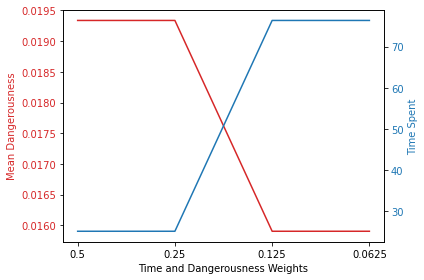

In [346]:
# Create some mock data
weight = Weight_Number_Only_List
data1 = Mean_Dangerousness_List
data2 = Time_Spent_List

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time and Dangerousness Weights')
ax1.set_ylabel('Mean Dangerousness', color=color)
ax1.plot(weight, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Time Spent', color=color)  # we already handled the x-label with ax1
ax2.plot(weight, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [347]:
G_Drive.get_edge_data(x,y)